<a href="https://colab.research.google.com/github/harsha5428/datascience_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Load column names from the specified text file
columns_file_path_bre = '/content/drive/MyDrive/Colab Notebooks/breast+cancer+wisconsin+diagnostic/column_name_breast.txt'
with open(columns_file_path_bre, 'r') as file:
    column_names_bre = file.read().splitlines()

# Load the main dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/breast+cancer+wisconsin+diagnostic/wdbc.data'
data_bre = pd.read_csv(file_path, header=None, names=column_names_bre)

# Display the first few rows to verify
print(data_bre.head())


         ID Diagnosis  Radius Mean  Texture Mean  Perimeter Mean  Area Mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness Mean  Compactness Mean  Concavity Mean  Concave Points Mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius Worst  Texture Worst  Perimeter Worst  Area Wor

In [ ]:
data_bre.isnull().sum()

ID                         0
Diagnosis                  0
Radius Mean                0
Texture Mean               0
Perimeter Mean             0
Area Mean                  0
Smoothness Mean            0
Compactness Mean           0
Concavity Mean             0
Concave Points Mean        0
Symmetry Mean              0
Fractal Dimension Mean     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave Points SE          0
Symmetry SE                0
Fractal Dimension SE       0
Radius Worst               0
Texture Worst              0
Perimeter Worst            0
Area Worst                 0
Smoothness Worst           0
Compactness Worst          0
Concavity Worst            0
Concave Points Worst       0
Symmetry Worst             0
Fractal Dimension Worst    0
dtype: int64

In [ ]:
data_bre.drop(["ID"], inplace=True, axis=1)
data_bre.head()

Diagnosis  Radius Mean  Texture Mean  Perimeter Mean  Area Mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   Smoothness Mean  Compactness Mean  Concavity Mean  Concave Points Mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   Symmetry Mean  ...  Radius Worst  Texture Worst  Perimeter Worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   Area Worst  Smoothness Worst  Compactness Worst  Concavity Worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   Concave Points Worst  Symmetry Worst  Fractal Dimension Worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
data_bre.shape
data_bre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   Radius Mean              569 non-null    float64
 2   Texture Mean             569 non-null    float64
 3   Perimeter Mean           569 non-null    float64
 4   Area Mean                569 non-null    float64
 5   Smoothness Mean          569 non-null    float64
 6   Compactness Mean         569 non-null    float64
 7   Concavity Mean           569 non-null    float64
 8   Concave Points Mean      569 non-null    float64
 9   Symmetry Mean            569 non-null    float64
 10  Fractal Dimension Mean   569 non-null    float64
 11  Radius SE                569 non-null    float64
 12  Texture SE               569 non-null    float64
 13  Perimeter SE             569 non-null    float64
 14  Area SE                  5

In [ ]:
data_bre.describe()

Radius Mean  Texture Mean  Perimeter Mean    Area Mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       Smoothness Mean  Compactness Mean  Concavity Mean  Concave Points Mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       Symmetry Mean  Fractal Dimension Mean  ...  Radius Worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       Texture Worst  Perimeter Worst   Area Worst  Smoothness Worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       Compactness Worst  Concavity Worst  Concave Points Worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       Symmetry Worst  Fractal Dimension Worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [ ]:
malig_count_bre = data_bre['Diagnosis'].value_counts().get('M')
begn_count_bre = data_bre['Diagnosis'].value_counts().get('B')

print('Num of malignant cases:', malig_count_bre)
print('Num of benign cases:', begn_count_bre)

Num of malignant cases: 212
Num of benign cases: 357


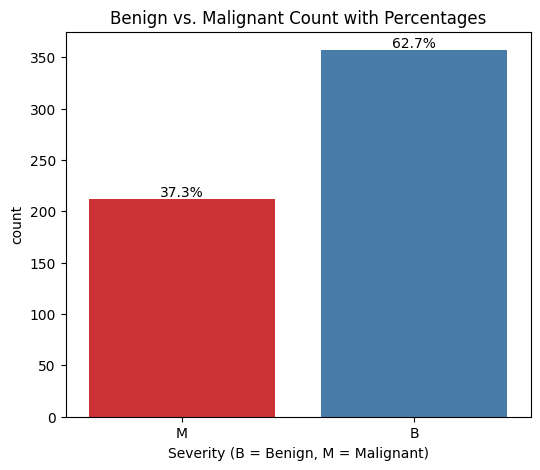

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
ax = sns.countplot(data=data_bre, x='Diagnosis',hue='Diagnosis', palette='Set1',legend=False)
total = len(data_bre)
# Add percentage labels above each bar
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Benign vs. Malignant Count with Percentages')
plt.xlabel('Severity (B = Benign, M = Malignant)')
plt.show()


In [ ]:
data_bre['Diagnosis'] = data_bre['Diagnosis'].replace({'B': 0,'M': 1})

<ipython-input-9-8f79917cba45>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_bre['Diagnosis'] = data_bre['Diagnosis'].replace({'B': 0,'M': 1})


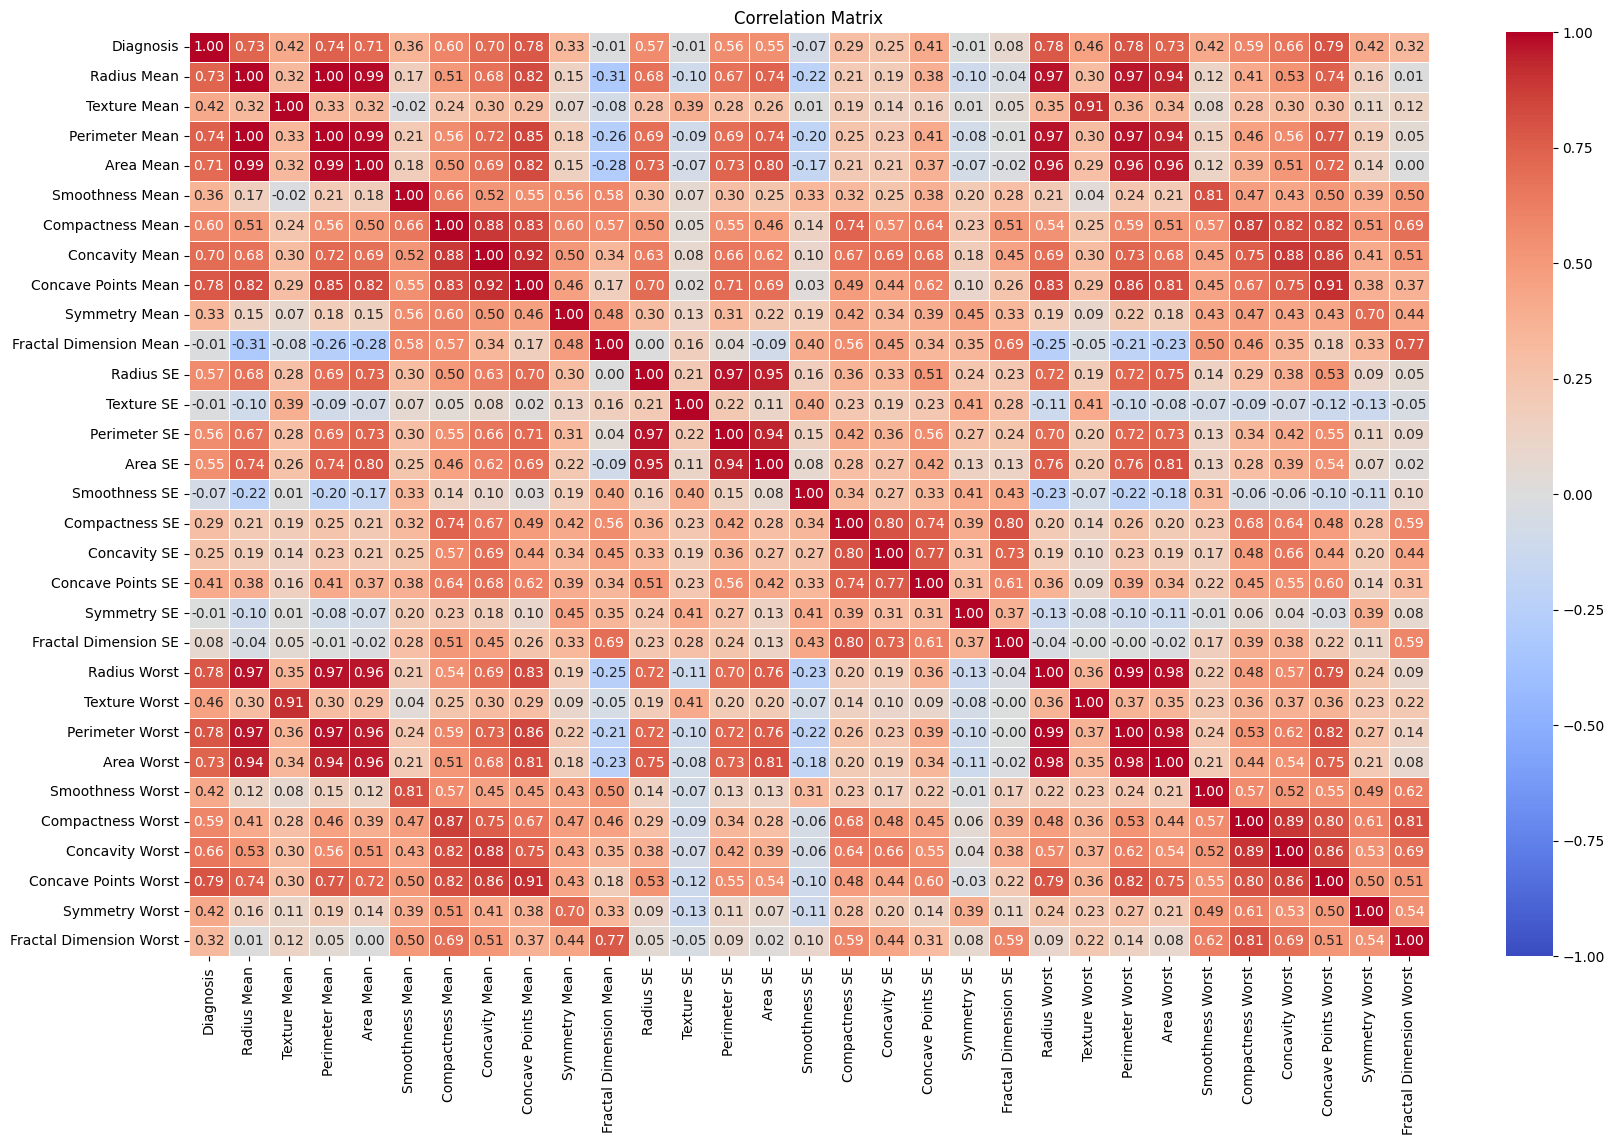

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data_bre.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 12))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# 1. Identify Highly Correlated Features
# Set correlation threshold
correlation_threshold = 0.9

# Create the correlation matrix (excluding target variable)
correlation_matrix = data_bre.drop(columns=['Diagnosis']).corr()

# Mask the upper triangle of the correlation matrix to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Get the indices of features with high correlation (above the threshold)
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.append(colname)

# Remove duplicate entries if any
highly_correlated_features = list(set(highly_correlated_features))

# Print the features that will be dropped
print("Highly correlated features (will be dropped):", highly_correlated_features)

# 2. Remove the highly correlated features from the dataset (exclude target variable)
data_bre_clean = data_bre.drop(columns=highly_correlated_features)

# 3. Re-add the target variable back to the cleaned dataset
data_bre_clean['Diagnosis'] = data_bre['Diagnosis']



Highly correlated features (will be dropped): ['Perimeter Mean', 'Concave Points Worst', 'Area Mean', 'Perimeter Worst', 'Texture Worst', 'Concave Points Mean', 'Perimeter SE', 'Area SE', 'Area Worst', 'Radius Worst']


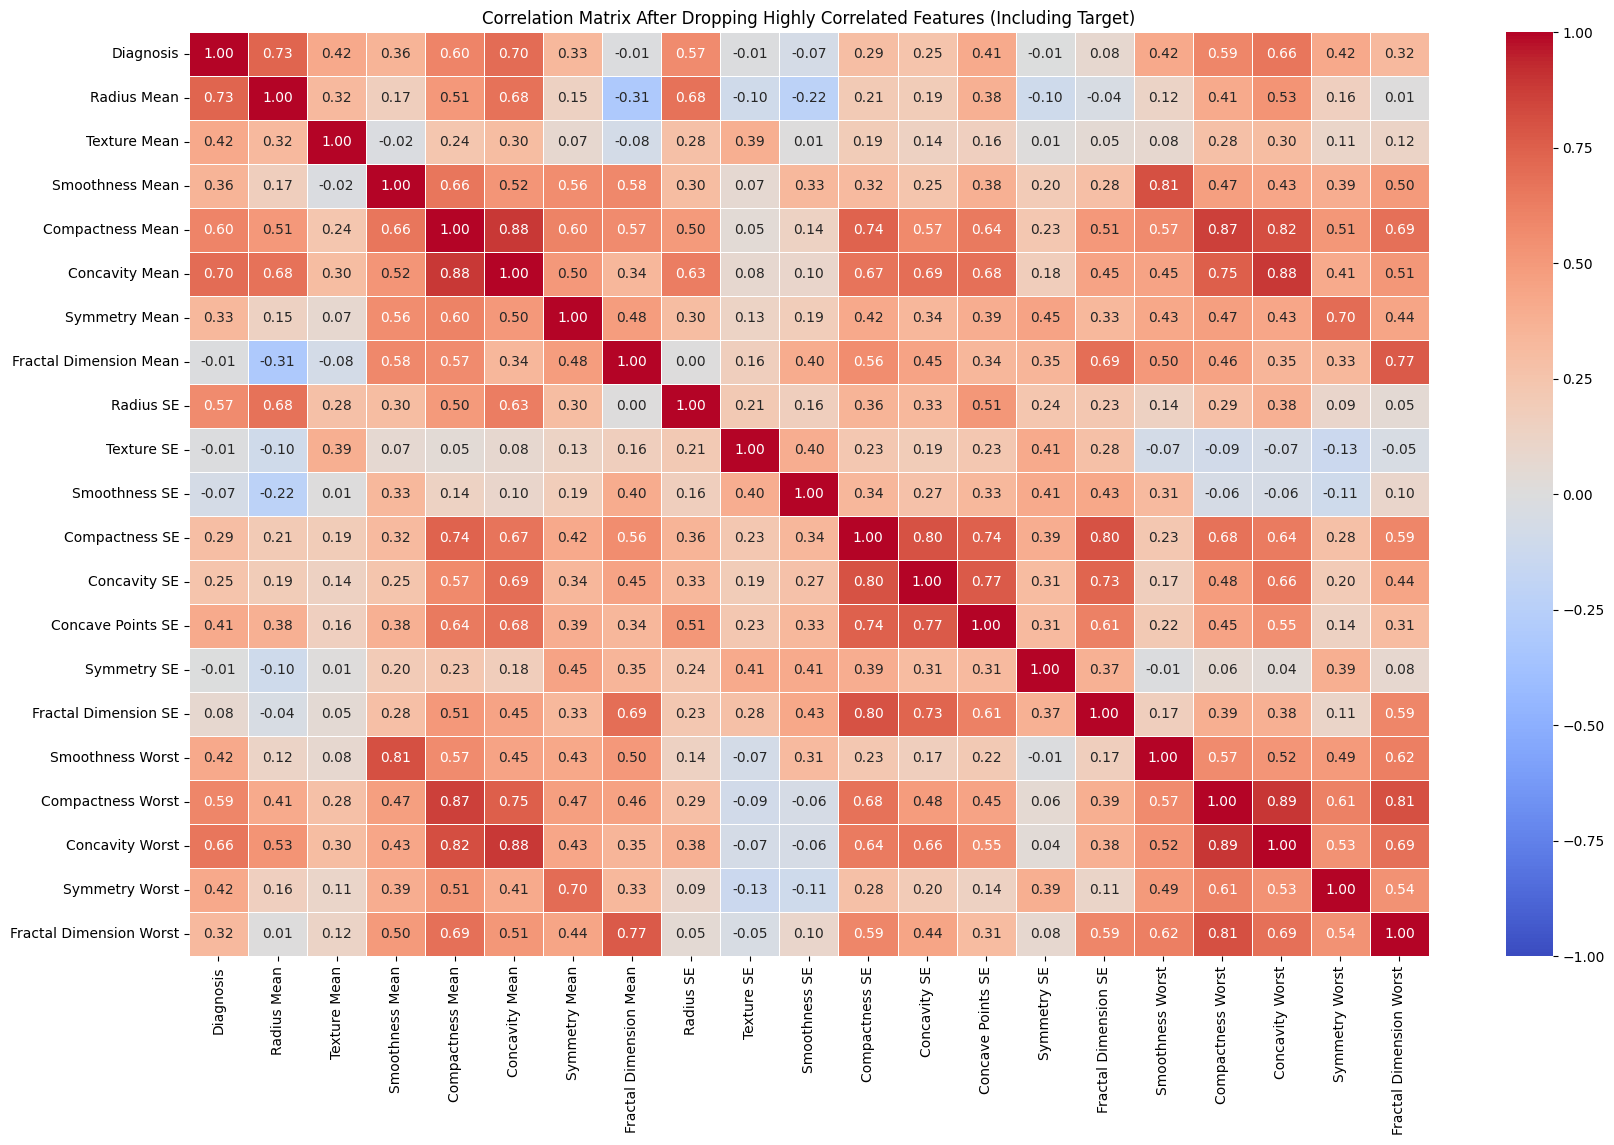

In [ ]:
# 4. Create the correlation matrix for the cleaned dataset (including target variable)
correlation_matrix_cleaned = data_bre_clean.corr()

# Visualize the correlation matrix after removing highly correlated features
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix After Dropping Highly Correlated Features (Including Target)")
plt.show()


In [ ]:
data_bre_clean.shape

(569, 21)

In [ ]:
data_bre_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   Radius Mean              569 non-null    float64
 2   Texture Mean             569 non-null    float64
 3   Smoothness Mean          569 non-null    float64
 4   Compactness Mean         569 non-null    float64
 5   Concavity Mean           569 non-null    float64
 6   Symmetry Mean            569 non-null    float64
 7   Fractal Dimension Mean   569 non-null    float64
 8   Radius SE                569 non-null    float64
 9   Texture SE               569 non-null    float64
 10  Smoothness SE            569 non-null    float64
 11  Compactness SE           569 non-null    float64
 12  Concavity SE             569 non-null    float64
 13  Concave Points SE        569 non-null    float64
 14  Symmetry SE              5

In [ ]:
# Function for Cross-Validation
def perform_cross_validation(model, X, y, cv=5, scoring='f1'):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    print(f"Cross-validation scores ({scoring}): {cv_scores}")
    print(f"Average cross-validation score ({scoring}): {np.mean(cv_scores):.4f}")
    return np.mean(cv_scores)

In [ ]:
# Function for Plotting Learning Curve
def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy', title='Learning Curve', train_sizes=np.linspace(0.1, 1.0, 10)):
    print("Starting Learning Curve Analysis...")
    print(f"Estimator: {estimator}")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, random_state=42, n_jobs=-1)
    train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='orange', marker='s')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
    plt.title(title, fontsize=16)
    plt.xlabel('Training Set Size', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.show()

In [ ]:
# Define features and target after removing highly correlated features
X_clean = data_bre_clean.drop(columns=['Diagnosis'])
y_clean = data_bre_clean['Diagnosis']

# 4. Train-Test Split and Standardization (on cleaned data)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Hyperparameter Tuning for Imbalanced Data
param_grid_rf = {
    'n_estimators': [30, 50, 100],
    'max_depth': [5, 6, 7],  # Experiment with reducing or slightly increasing depth
    'min_samples_split': [15, 20, 25],  # Test nearby values for optimal split size
    'min_samples_leaf': [6, 8, 10],  # Adjust minimum leaf size to reduce variance
    'max_features': ['sqrt', 'log2'],  # Explore using logarithmic feature count for splits
    'max_samples': [0.5, 0.6, 0.7]  # Experiment with seeing more training data for each tree
}


In [ ]:
# Train Random Forest on Imbalanced Data ###
print("\n----- Training on Imbalanced Data -----")
rf = RandomForestClassifier(
    n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42
)



rf.fit(X_train, y_train)
perform_cross_validation(rf, X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy (Imbalanced Data):", accuracy_score(y_test, y_pred_rf))



----- Training on Imbalanced Data -----
Cross-validation scores (f1): [0.84375    0.90322581 0.91666667 0.9375     0.92537313]
Average cross-validation score (f1): 0.9053
Random Forest Accuracy (Imbalanced Data): 0.956140350877193


In [ ]:
print("Classification Report (Imbalanced Data):\n", classification_report(y_test, y_pred_rf, target_names=['Benign', 'Malignant']))

Classification Report (Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        71
   Malignant       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



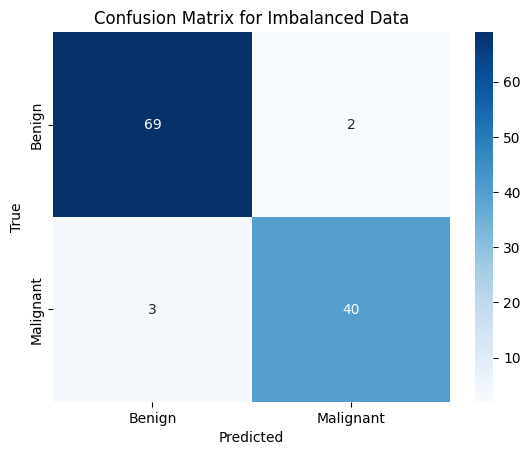

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Imbalanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
plot_learning_curve(rf, X_train, y_train, cv=5, title="Learning Curve for Imbalanced Data")

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=6, max_samples=0.5, min_samples_leaf=8,
                       min_samples_split=20, n_estimators=30, random_state=42)



KeyboardInterrupt



In [ ]:
#hyper parameter tuning for imbalance
grid_rf_imbalanced = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid_rf,
                                   cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_imbalanced.fit(X_train, y_train)

# Print the best parameters and score for the imbalanced dataset
print("Best parameters for Random Forest (Imbalanced Data):", grid_rf_imbalanced.best_params_)
print("Best cross-validated accuracy (Imbalanced Data):", grid_rf_imbalanced.best_score_)

# Train the model with the best parameters
best_rf_imbalanced = grid_rf_imbalanced.best_estimator_
best_rf_imbalanced.fit(X_train, y_train)
y_pred_best_rf_imbalanced = best_rf_imbalanced.predict(X_test)

In [ ]:
# Compute the confusion matrix
conf_matrix_best_rf_imbalanced = confusion_matrix(y_test, y_pred_best_rf_imbalanced)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_best_rf_imbalanced, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best Random Forest (Imbalanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:

# Save the model to Google Drive
joblib.dump(best_rf_imbalanced, '/content/drive/My Drive/best_rf_model_imbalanced.pkl')

In [ ]:
# Print the classification report for the best model
print("Classification Report for Best Random Forest (Imbalanced Data):\n", classification_report(y_test, y_pred_best_rf_imbalanced, target_names=['Benign', 'Malignant']))


In [ ]:
plot_learning_curve(best_rf_imbalanced, X_train, y_train, cv=5, title="Learning Curve for Best Random Forest (Imbalanced Data)")

In [ ]:
# Apply RFE on Imbalanced Data and Train Model ###
print("\n----- Training with RFE on Imbalanced Data -----")
rfe_selector = RFE(estimator=rf, n_features_to_select=10, step=1)
rfe_selector.fit(X_train, y_train)
X_train_rfe = rfe_selector.transform(X_train)
X_test_rfe = rfe_selector.transform(X_test)
rf_rfe = RandomForestClassifier(
    n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42
)
rf_rfe.fit(X_train_rfe, y_train)
perform_cross_validation(rf_rfe, X_train_rfe, y_train)
y_pred_rfe = rf_rfe.predict(X_test_rfe)
print("Random Forest Accuracy (RFE on Imbalanced Data):", accuracy_score(y_test, y_pred_rfe))


----- Training with RFE on Imbalanced Data -----
Cross-validation scores (f1): [0.86153846 0.90322581 0.88888889 0.90909091 0.90909091]
Average cross-validation score (f1): 0.8944
Random Forest Accuracy (RFE on Imbalanced Data): 0.9473684210526315


In [ ]:
# Assuming the original training data is a DataFrame with column names
import pandas as pd

# Let's say your original DataFrame is X_train_df
X_train_df = pd.DataFrame(X_train, columns=X_clean.columns)

# Get the original column names
feature_names = X_train_df.columns

# Get the mask of selected features from RFE
selected_features_mask = rfe_selector.support_

# Get the names of the selected features
selected_features = feature_names[selected_features_mask]

# Print the selected features
print("Selected features after RFE:", selected_features)


Selected features after RFE: Index(['Radius Mean', 'Texture Mean', 'Compactness Mean', 'Concavity Mean',
       'Radius SE', 'Concavity SE', 'Smoothness Worst', 'Compactness Worst',
       'Concavity Worst', 'Symmetry Worst'],
      dtype='object')


In [ ]:
print("Classification Report (RFE on Imbalanced Data):\n", classification_report(y_test, y_pred_rfe, target_names=['Benign', 'Malignant']))

Classification Report (RFE on Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.95      0.97      0.96        71
   Malignant       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



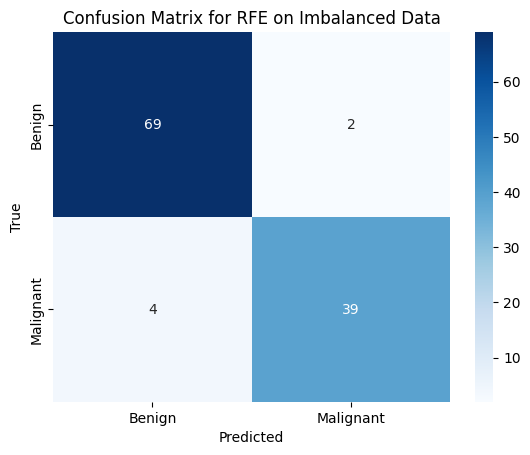

In [ ]:
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)
sns.heatmap(conf_matrix_rfe, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for RFE on Imbalanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=6, max_samples=0.5, min_samples_leaf=8,
                       min_samples_split=20, n_estimators=30, random_state=42)


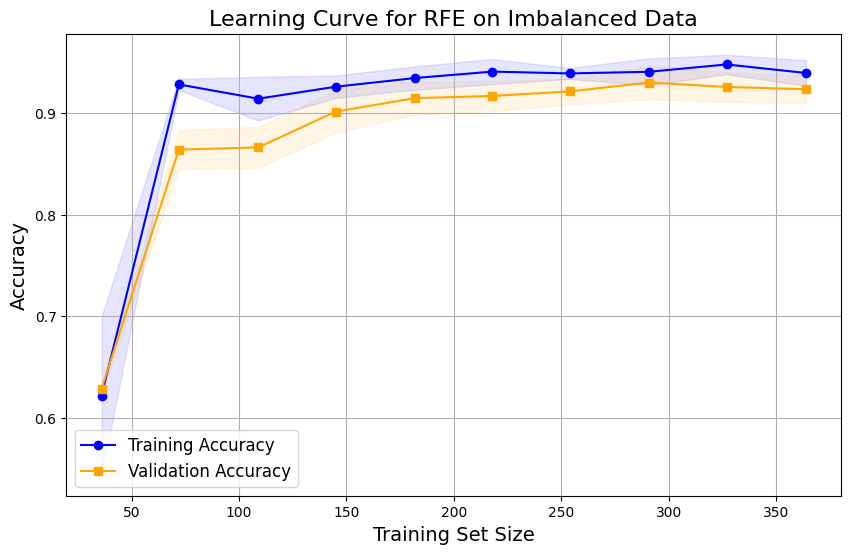

In [ ]:
plot_learning_curve(rf_rfe, X_train_rfe, y_train, cv=5, title="Learning Curve for RFE on Imbalanced Data")

Best parameters for Random Forest (RFE on Imbalanced Data): {'max_depth': 6, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 30}
Best cross-validated accuracy (RFE on Imbalanced Data): 0.9384615384615385
Classification Report for Best Random Forest (RFE on Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=6, max_samples=0.7, min_samples_leaf=6,
                       min_samples_split=15, n_estimators=30, random_state=42)


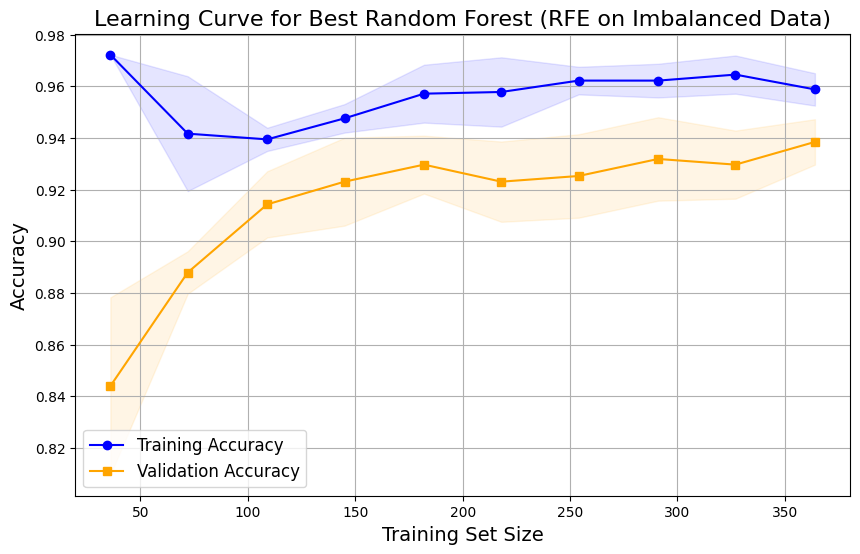

In [ ]:
# Hyperparameter Tuning for RFE on Imbalanced Data
grid_rf_rfe = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid_rf,
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_rfe.fit(X_train_rfe, y_train)

# Print the best parameters and score for the RFE on imbalanced dataset
print("Best parameters for Random Forest (RFE on Imbalanced Data):", grid_rf_rfe.best_params_)
print("Best cross-validated accuracy (RFE on Imbalanced Data):", grid_rf_rfe.best_score_)

# Train the model with the best parameters
best_rf_rfe = grid_rf_rfe.best_estimator_
best_rf_rfe.fit(X_train_rfe, y_train)
y_pred_best_rf_rfe = best_rf_rfe.predict(X_test_rfe)


In [ ]:
# Compute the confusion matrix
conf_matrix_best_rf_rfe = confusion_matrix(y_test, y_pred_best_rf_rfe)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_best_rf_rfe, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best Random Forest (RFE on Imbalanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Print the classification report for the best model
print("Classification Report for Best Random Forest (RFE on Imbalanced Data):\n", classification_report(y_test, y_pred_best_rf_rfe, target_names=['Benign', 'Malignant']))

In [ ]:
# Plot the learning curve for the best model
plot_learning_curve(best_rf_rfe, X_train_rfe, y_train, cv=5, title="Learning Curve for Best Random Forest (RFE on Imbalanced Data)")

In [ ]:
joblib.dump(best_rf_rfe, '/content/drive/My Drive/best_rf_rfe.pkl')

['/content/drive/My Drive/best_rf_rfe.pkl']

In [ ]:
# Apply SMOTE to Balance Data and Train Model ###
print("\n----- Training with SMOTE Balanced Data -----")
print("Original class distribution:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_balanced))
rf1 = RandomForestClassifier(n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42)
rf1.fit(X_train_balanced, y_train_balanced)
perform_cross_validation(rf1, X_train_balanced, y_train_balanced)
y_pred_rf1 = rf1.predict(X_test)
print("Random Forest Accuracy after SMOTE:", accuracy_score(y_test, y_pred_rf1))


----- Training with SMOTE Balanced Data -----
Original class distribution: Counter({0: 286, 1: 169})
Class distribution after SMOTE: Counter({0: 286, 1: 286})
Cross-validation scores (f1): [0.92307692 0.96551724 0.9009009  0.95652174 0.97391304]
Average cross-validation score (f1): 0.9440
Random Forest Accuracy after SMOTE: 0.9649122807017544


In [ ]:
print("Classification Report after SMOTE:\n", classification_report(y_test, y_pred_rf1, target_names=['Benign', 'Malignant']))

Classification Report after SMOTE:
               precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



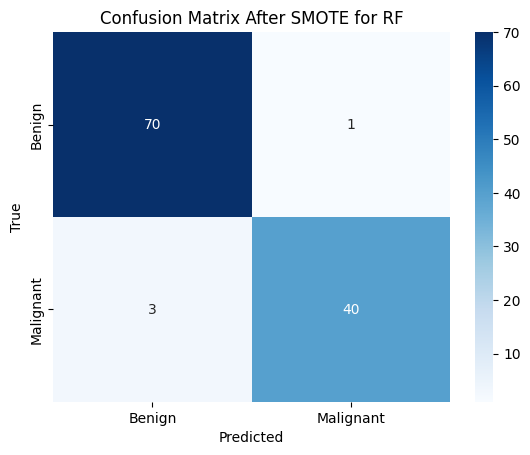

In [ ]:
conf_matrix_rf1 = confusion_matrix(y_test, y_pred_rf1)
sns.heatmap(conf_matrix_rf1, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix After SMOTE for RF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=6, max_samples=0.5, min_samples_leaf=8,
                       min_samples_split=20, n_estimators=30, random_state=42)


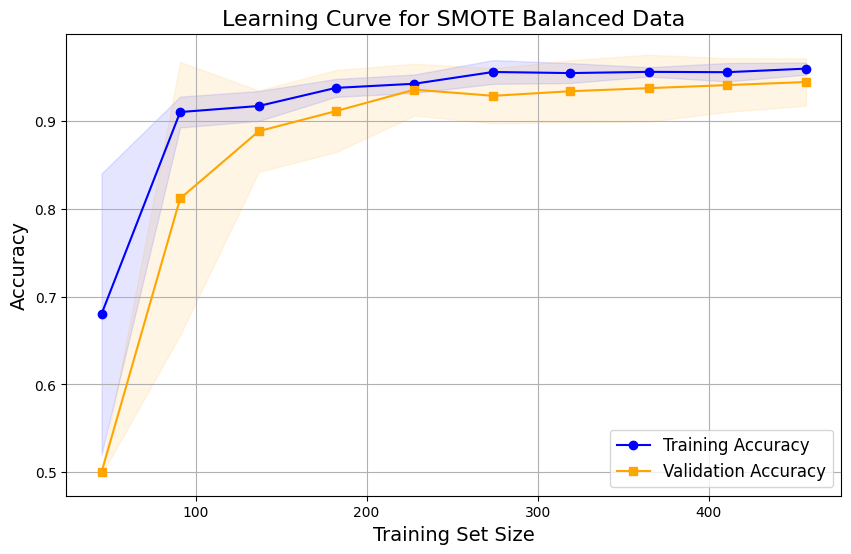

In [ ]:
plot_learning_curve(rf1, X_train_balanced, y_train_balanced, cv=5, title="Learning Curve for SMOTE Balanced Data")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest (SMOTE Balanced Data): {'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 30}
Best cross-validated accuracy (SMOTE Balanced Data): 0.9510450038138826
Classification Report for Best Random Forest (SMOTE Balanced Data):
               precision    recall  f1-score   support

      Benign       0.97      0.96      0.96        71
   Malignant       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=5, max_samples=0.6, min_samples_leaf=6,
                       min_samples_split=15, n_estimators=30, random_state=42)


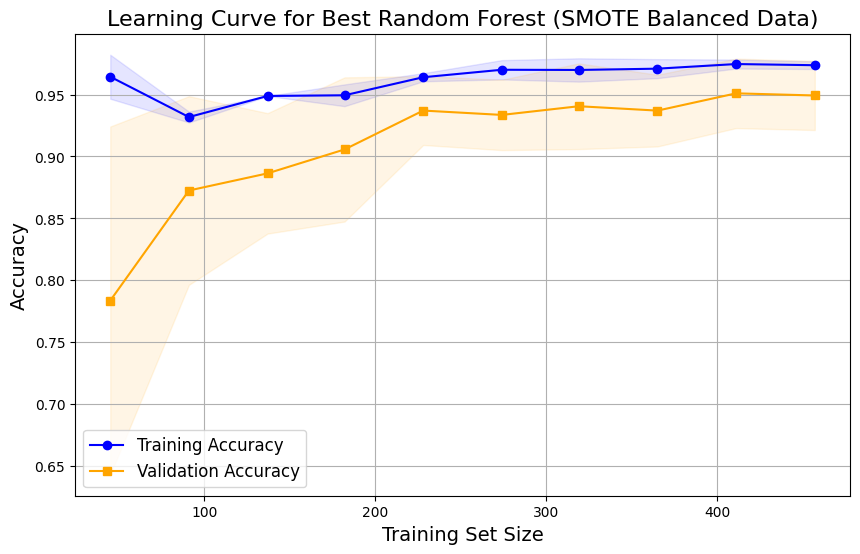

In [ ]:
# Hyperparameter Tuning for SMOTE Balanced Data
grid_rf_smote = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                             param_grid=param_grid_rf,
                             cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_smote.fit(X_train_balanced, y_train_balanced)

# Print the best parameters and score for the SMOTE balanced dataset
print("Best parameters for Random Forest (SMOTE Balanced Data):", grid_rf_smote.best_params_)
print("Best cross-validated accuracy (SMOTE Balanced Data):", grid_rf_smote.best_score_)

# Train the model with the best parameters
best_rf_smote = grid_rf_smote.best_estimator_
best_rf_smote.fit(X_train_balanced, y_train_balanced)
y_pred_best_rf_smote = best_rf_smote.predict(X_test)

# Print the classification report for the best model
print("Classification Report for Best Random Forest (SMOTE Balanced Data):\n", classification_report(y_test, y_pred_best_rf_smote, target_names=['Benign', 'Malignant']))

# Plot the learning curve for the best model
plot_learning_curve(best_rf_smote, X_train_balanced, y_train_balanced, cv=5, title="Learning Curve for Best Random Forest (SMOTE Balanced Data)")


In [ ]:
# Compute the confusion matrix
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_best_rf_smote)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best Random Forest (SMOTE Balanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
joblib.dump(best_rf_smote, '/content/drive/My Drive/best_rf_smote.pkl')

['/content/drive/My Drive/best_rf_smote.pkl']

In [ ]:
# Apply RFE After SMOTE and Train Model ###
print("\n----- Training with RFE on SMOTE Balanced Data -----")
rfe_selector_smot_rf = RFE(estimator=rf1, n_features_to_select=10, step=1)
rfe_selector_smot_rf.fit(X_train_balanced, y_train_balanced)
X_train_rfe_smot = rfe_selector_smot_rf.transform(X_train_balanced)
X_test_rfe_smot = rfe_selector_smot_rf.transform(X_test)
rf_rfe_smot = RandomForestClassifier(n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42)
rf_rfe_smot.fit(X_train_rfe_smot, y_train_balanced)
perform_cross_validation(rf_rfe_smot, X_train_rfe_smot, y_train_balanced)
y_pred_rfe_smot = rf_rfe_smot.predict(X_test_rfe_smot)
print("Random Forest Accuracy (RFE after SMOTE):", accuracy_score(y_test, y_pred_rfe_smot))


----- Training with RFE on SMOTE Balanced Data -----
Cross-validation scores (f1): [0.89473684 0.95726496 0.86725664 0.93333333 0.95726496]
Average cross-validation score (f1): 0.9220
Random Forest Accuracy (RFE after SMOTE): 0.9649122807017544


In [ ]:
print("Classification Report (RFE after SMOTE):\n", classification_report(y_test, y_pred_rfe_smot, target_names=['Benign', 'Malignant']))

Classification Report (RFE after SMOTE):
               precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



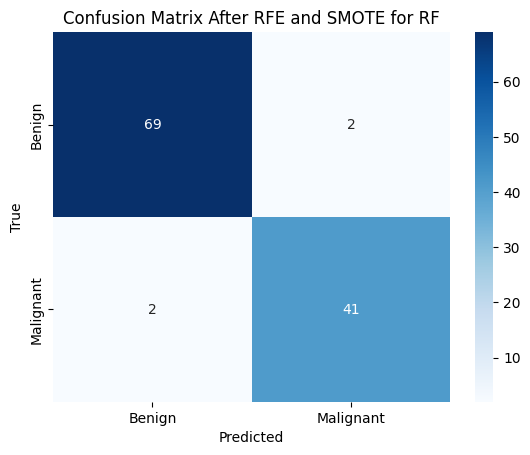

In [ ]:
conf_matrix_rfe_smot = confusion_matrix(y_test, y_pred_rfe_smot)
sns.heatmap(conf_matrix_rfe_smot, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix After RFE and SMOTE for RF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=6, max_samples=0.5, min_samples_leaf=8,
                       min_samples_split=20, n_estimators=30, random_state=42)


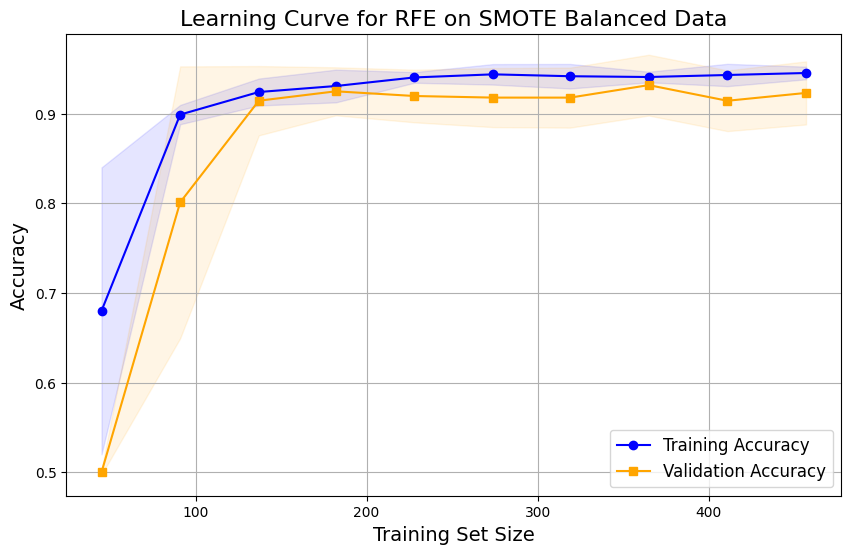

In [ ]:
plot_learning_curve(rf_rfe_smot, X_train_rfe_smot, y_train_balanced, cv=5, title="Learning Curve for RFE on SMOTE Balanced Data")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest (RFE on SMOTE Balanced Data): {'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 50}
Best cross-validated accuracy (RFE on SMOTE Balanced Data): 0.9475514874141876
Classification Report for Best Random Forest (RFE on SMOTE Balanced Data):
               precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=5, max_samples=0.6, min_samples_leaf=6,
                       min_samples_split=15, n_estimators=50, random_state=42)


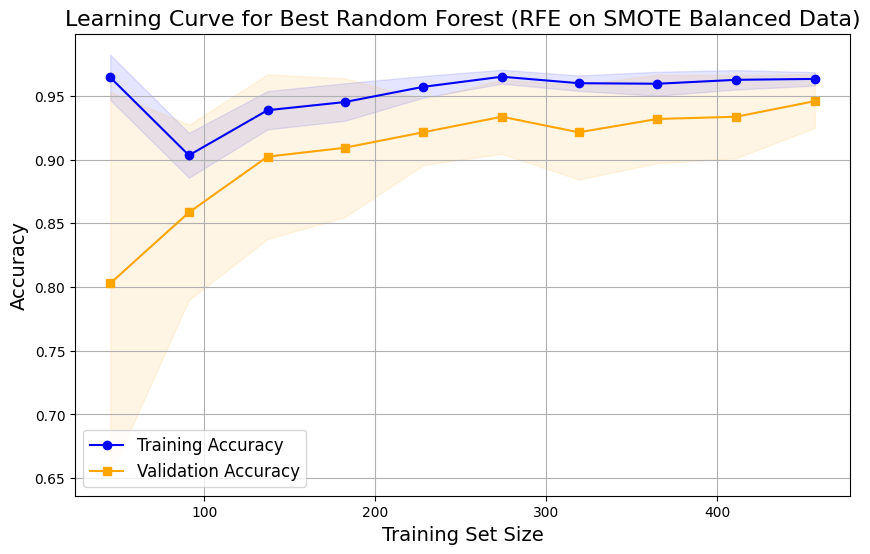

In [ ]:
# Hyperparameter Tuning for RFE on SMOTE Balanced Data
grid_rf_rfe_smote = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                 param_grid=param_grid_rf,
                                 cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_rfe_smote.fit(X_train_rfe_smot, y_train_balanced)

# Print the best parameters and score for the RFE on SMOTE balanced dataset
print("Best parameters for Random Forest (RFE on SMOTE Balanced Data):", grid_rf_rfe_smote.best_params_)
print("Best cross-validated accuracy (RFE on SMOTE Balanced Data):", grid_rf_rfe_smote.best_score_)

# Train the model with the best parameters
best_rf_rfe_smote = grid_rf_rfe_smote.best_estimator_
best_rf_rfe_smote.fit(X_train_rfe_smot, y_train_balanced)
y_pred_best_rf_rfe_smote = best_rf_rfe_smote.predict(X_test_rfe_smot)

# Print the classification report for the best model
print("Classification Report for Best Random Forest (RFE on SMOTE Balanced Data):\n", classification_report(y_test, y_pred_best_rf_rfe_smote, target_names=['Benign', 'Malignant']))

# Plot the learning curve for the best model
plot_learning_curve(best_rf_rfe_smote, X_train_rfe_smot, y_train_balanced, cv=5, title="Learning Curve for Best Random Forest (RFE on SMOTE Balanced Data)")

In [ ]:
# Compute the confusion matrix
conf_matrix_smote_rfe_smote = confusion_matrix(y_test, y_pred_best_rf_rfe_smote)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_smote_rfe_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best Random Forest (RFE on SMOTE Balanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
joblib.dump(best_rf_rfe_smote, '/content/drive/My Drive/best_rf_rfe_smote.pkl')

['/content/drive/My Drive/best_rf_rfe_smote.pkl']

In [ ]:
param_grid_svm = {
    'C': [0.01, 0.1, 1],                 # Regularization parameter: smaller values like 0.01 or 0.1 will penalize larger weights more, helping to reduce overfitting
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Types of kernel functions to test. Each kernel defines a different method to map the data into a higher-dimensional space.
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. Smaller values increase the decision boundary's smoothness and reduce overfitting.
    'degree': [2, 3, 4, 5],              # Degree of the polynomial kernel function. Only relevant when using the 'poly' kernel.
    'class_weight': [None, 'balanced'],  # Balances class weights automatically for imbalanced datasets, setting weights inversely proportional to class frequencies.
}


In [ ]:
print("\n----- Training SVM on Imbalanced Data -----")

# Initialize the Support Vector Classifier (SVC) with specified hyperparameters
svm = SVC(
    C=0.1,                # Regularization parameter; smaller value reduces overfitting by increasing margin
    random_state=42,      # Random seed for reproducibility
    probability=True      # Enables probability estimates for classification
)
# Train the SVM model on the imbalanced training data
svm.fit(X_train, y_train)
# Perform cross-validation to evaluate the model on the training data
perform_cross_validation(svm, X_train, y_train)
# Predict the labels for the test set using the trained SVM model
y_pred_svm = svm.predict(X_test)
# Evaluate the model's accuracy on the test set
print("SVM Accuracy (Imbalanced Data):", accuracy_score(y_test, y_pred_svm))



----- Training SVM on Imbalanced Data -----
Cross-validation scores (f1): [0.95238095 0.92063492 0.8852459  0.92307692 0.86666667]
Average cross-validation score (f1): 0.9096
SVM Accuracy (Imbalanced Data): 0.956140350877193


In [ ]:
# Print a detailed classification report for SVM(Imbalanced Data)
print("Classification Report for SVM(Imbalanced Data):\n", classification_report(y_test, y_pred_svm, target_names=['Benign', 'Malignant']))

Classification Report for SVM(Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        71
   Malignant       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



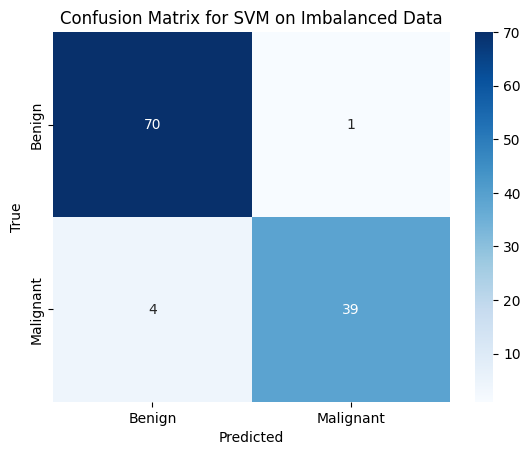

In [ ]:
# Compute the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for SVM on Imbalanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

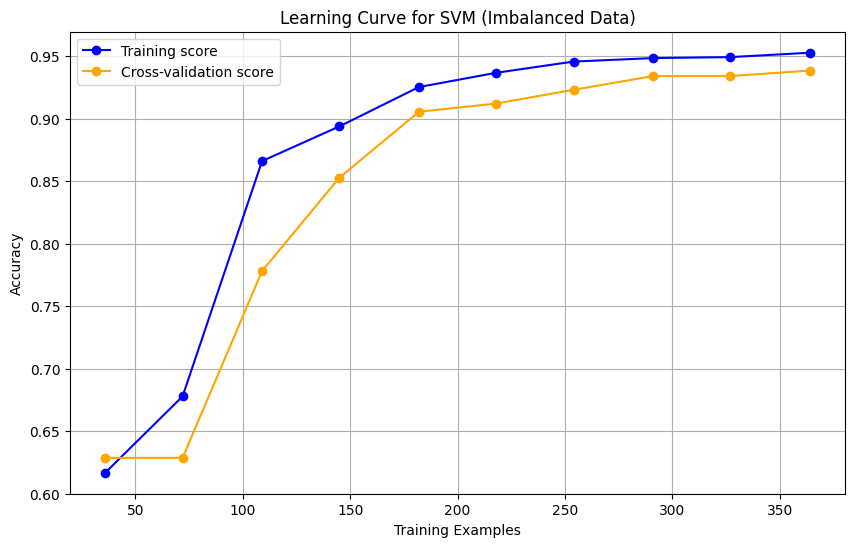

In [ ]:
# Plot the learning curve for the SVM (Imbalanced Data)
plot_learning_curve(svm, X_train, y_train, cv=5, use_smote=False,title="Learning Curve for SVM (Imbalanced Data)")

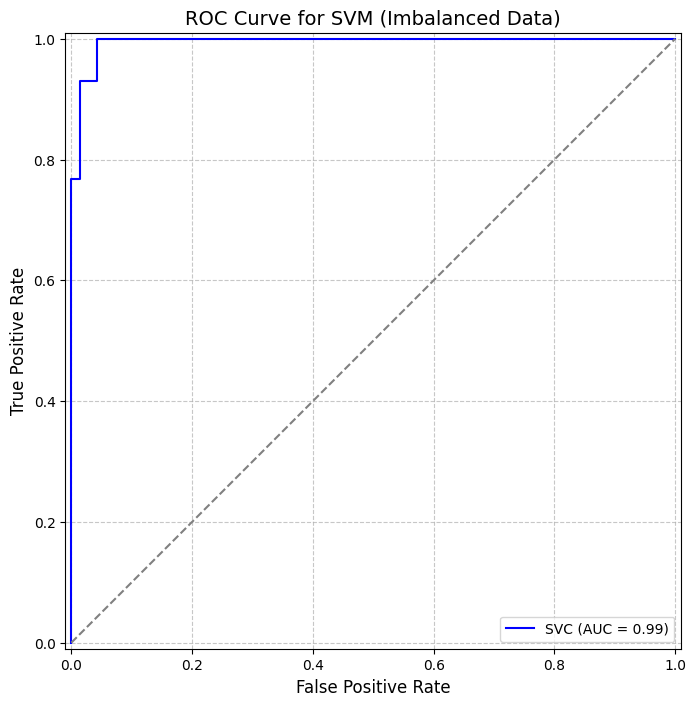

In [ ]:
# Plot the ROC curve for the SVM (Imbalanced Data)
plot_roc_curve_on(svm, X_test, y_test, title="ROC Curve for SVM (Imbalanced Data)")

In [ ]:
print("\n----- Training with Best parameters for SVM (Imbalanced Data) -----")
# Hyperparameter Tuning for SVM on Imbalanced Data
grid_svm_imbalanced = GridSearchCV(
    estimator=SVC(random_state=42, probability=True),  # Support Vector Classifier with fixed random seed and probability estimation enabled
    param_grid=param_grid_svm,                         # Predefined hyperparameter grid for tuning
    cv=5,                                              # 5-fold cross-validation for model evaluation
    scoring='accuracy',                                # Accuracy as the evaluation metric
    n_jobs=-1                                          # Use all available processors for parallel computation
)

# Fit the GridSearchCV object to the imbalanced training data
grid_svm_imbalanced.fit(X_train, y_train)

# Print the best combination of hyperparameters found during the grid search
print("Best parameters for SVM (Imbalanced Data):", grid_svm_imbalanced.best_params_)

# Print the best cross-validated accuracy achieved with the best hyperparameters
print("Best cross-validated accuracy (Imbalanced Data):", grid_svm_imbalanced.best_score_)

# Retrieve the best SVM model (optimized hyperparameters)
best_svm_imbalanced = grid_svm_imbalanced.best_estimator_

# Train the best model on the entire training set
best_svm_imbalanced.fit(X_train, y_train)

# Perform cross-validation on best svm imbalanced data
perform_cross_validation(best_svm_imbalanced, X_train, y_train)

# Predict labels for the test set using the best-tuned SVM model
y_pred_best_svm_imbalanced = best_svm_imbalanced.predict(X_test)



----- Training with Best parameters for SVM (Imbalanced Data) -----
Best parameters for SVM (Imbalanced Data): {'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated accuracy (Imbalanced Data): 0.9780219780219781
Cross-validation scores (f1): [0.98461538 0.93939394 0.95384615 0.96969697 0.95384615]
Average cross-validation score (f1): 0.9603


In [ ]:
# Print the detailed classification report for the test set
print("Classification Report for Best SVM (Imbalanced Data):\n",
      classification_report(y_test, y_pred_best_svm_imbalanced, target_names=['Benign', 'Malignant']))


Classification Report for Best SVM (Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



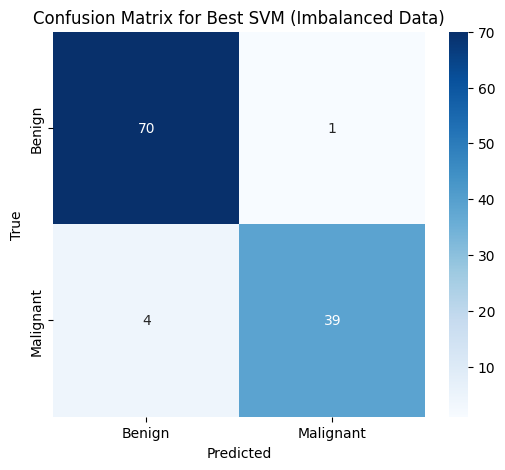

In [ ]:
# Compute the confusion matrix
conf_matrix_best_svm_imbalanced = confusion_matrix(y_test, y_pred_svm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_best_svm_imbalanced, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best SVM (Imbalanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


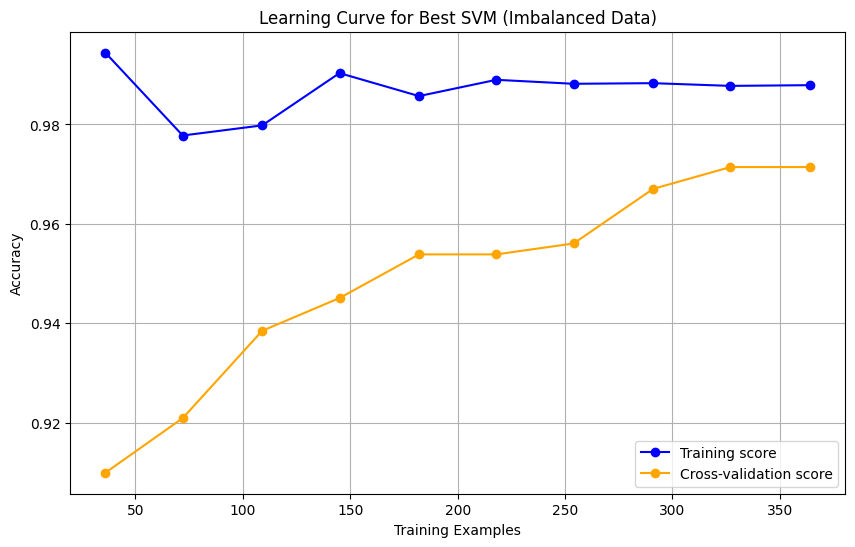

In [ ]:
# Plot the learning curve for Best SVM (Imbalanced Data)
plot_learning_curve(best_svm_imbalanced, X_train, y_train, cv=5, use_smote=False,title="Learning Curve for Best SVM (Imbalanced Data)")

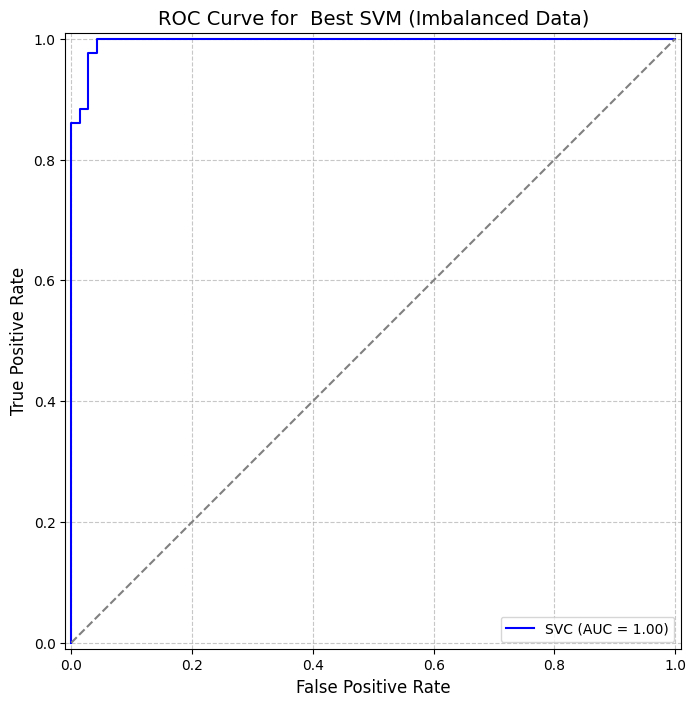

In [ ]:
# Plot the ROC curve for the Best SVM (Imbalanced Data)
plot_roc_curve_on(best_svm_imbalanced, X_test, y_test, title="ROC Curve for  Best SVM (Imbalanced Data)")

In [ ]:
# save the model best_svm_imbalanced in google drive
joblib.dump(best_svm_imbalanced, '/content/drive/My Drive/best_svm_imbalanced.pkl')

['/content/drive/My Drive/best_svm_imbalanced.pkl']

In [ ]:
print("\n----- Training SVM with RFE on Imbalanced Data -----")

# Initialize Recursive Feature Elimination (RFE) with SVM as the base estimator
rfe_selector_svm = RFE(
    estimator=SVC(kernel='linear'),  # SVM with linear kernel to rank features based on importance
    n_features_to_select=10,        # Number of top features to retain (10 features in this case)
    step=1                          # Eliminate one feature at a time during each iteration
)
# Fit the RFE selector on the imbalanced training data
rfe_selector_svm.fit(X_train, y_train)
# Transform the training and testing data to retain only the selected features
X_train_rfe_svm = rfe_selector_svm.transform(X_train)  # Reduced training data with selected features
X_test_rfe_svm = rfe_selector_svm.transform(X_test)    # Reduced test data with selected features
# Initialize the SVM classifier with specified hyperparameters
svm_rfe = SVC(
    C=0.1,                # Regularization parameter to control overfitting
    random_state=42,      # Random seed for reproducibility
    probability=True      # Enables probability estimates for classification
)
# Train the SVM model on the RFE-transformed training data
svm_rfe.fit(X_train_rfe_svm, y_train)

# Perform cross-validation to evaluate the SVM model on the RFE-transformed  imbalance training data
perform_cross_validation(svm_rfe, X_train_rfe_svm, y_train)

# Predict labels for the RFE-transformed test set using the trained SVM model
y_pred_rfe_svm = svm_rfe.predict(X_test_rfe_svm)
# Evaluate the model's accuracy on the test set
print("SVM Accuracy (RFE on Imbalanced Data):", accuracy_score(y_test, y_pred_rfe_svm))


----- Training SVM with RFE on Imbalanced Data -----
Cross-validation scores (f1): [0.95238095 0.93939394 0.90625    0.92307692 0.88888889]
Average cross-validation score (f1): 0.9220
SVM Accuracy (RFE on Imbalanced Data): 0.9385964912280702


In [ ]:
# Assuming the original training data is a DataFrame with column names
import pandas as pd

X_train_df_mamm = pd.DataFrame(X_train, columns=X_clean.columns)

# Get the original column names
feature_names_mamm = X_train_df_mamm.columns

# Get the mask of selected features from RFE
selected_features_mask_mamm = rfe_selector_svm.support_

# Get the names of the selected features
selected_features_svm = feature_names_mamm[selected_features_mask_mamm]

# Print the selected features
print("Selected features for svm after RFE:", selected_features_svm)


Selected features for svm after RFE: Index(['Compactness Mean', 'Radius SE', 'Compactness SE', 'Concavity SE',
       'Concave Points SE', 'Symmetry SE', 'Texture Worst', 'Perimeter Worst',
       'Compactness Worst', 'Symmetry Worst'],
      dtype='object')


In [ ]:
# Print the detailed classification report for RFE SVM (Imbalanced Data)
print("Classification Report for RFE SVM (Imbalanced Data):\n",
      classification_report(y_test, y_pred_rfe_svm, target_names=['Benign', 'Malignant']))

Classification Report for RFE SVM (Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.92      0.99      0.95        71
   Malignant       0.97      0.86      0.91        43

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



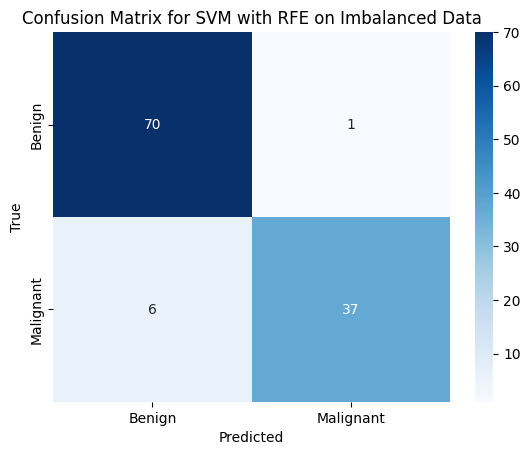

In [ ]:
# Compute the confusion matrix
conf_matrix_rfe_svm = confusion_matrix(y_test, y_pred_rfe_svm)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix_rfe_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for SVM with RFE on Imbalanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

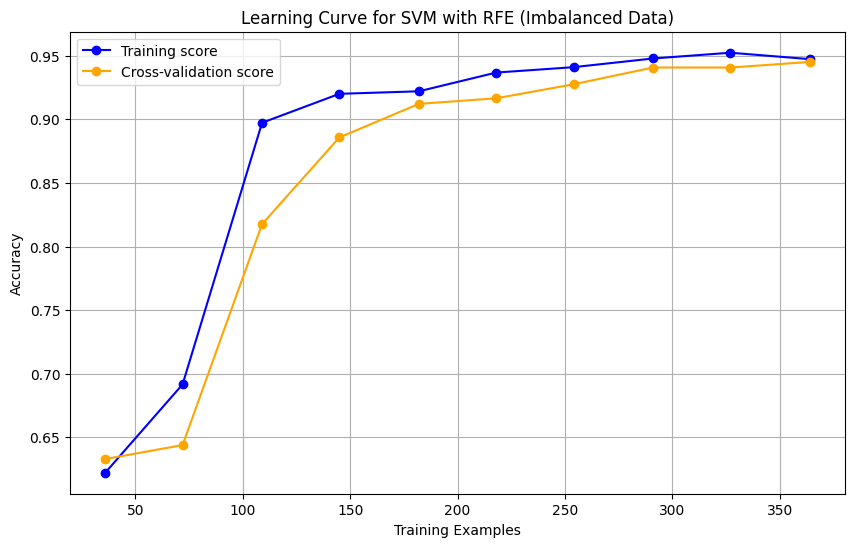

In [ ]:
# Plot the learning curve for SVM with RFE (Imbalanced Data)
plot_learning_curve(svm_rfe, X_train_rfe_svm, y_train, cv=5,use_smote=False,title="Learning Curve for SVM with RFE (Imbalanced Data)")

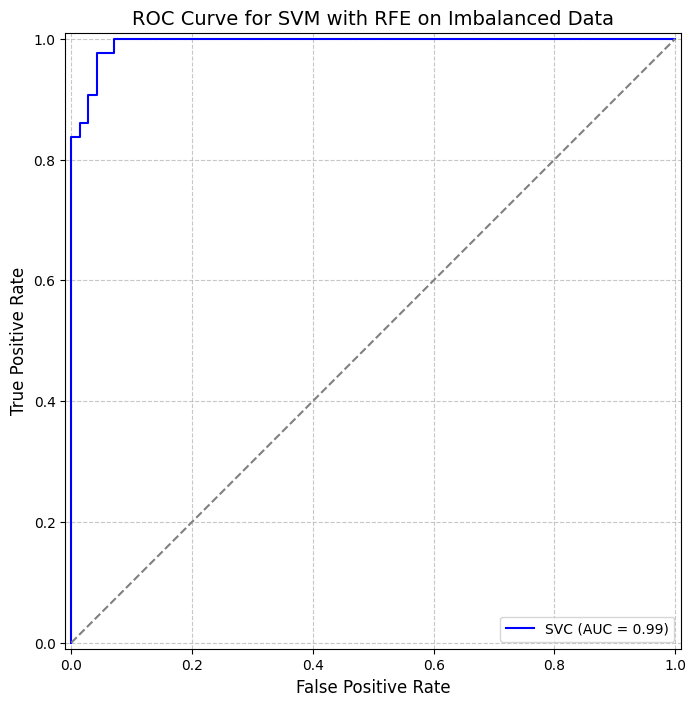

In [ ]:
# Plot the ROC curve for SVM with RFE (Imbalanced Data)
plot_roc_curve_on(svm_rfe, X_test_rfe_svm, y_test, title="ROC Curve for SVM with RFE on Imbalanced Data")

In [ ]:
print("\n----- Training with Best parameters for SVM (RFE on Imbalanced Data) -----")
# Hyperparameter Tuning for SVM with RFE on Imbalanced Data
grid_svm_rfe = GridSearchCV(
    estimator=SVC(random_state=42, probability=True),  # SVM model with probability estimation enabled
    param_grid=param_grid_svm,                         # Predefined hyperparameter grid for tuning
    cv=5,                                              # 5-fold cross-validation for model evaluation
    scoring='accuracy',                                # Accuracy as the evaluation metric
    n_jobs=-1                                          # Use all available processors for parallel computation
)

# Fit the GridSearchCV object to the RFE-transformed training data
grid_svm_rfe.fit(X_train_rfe_svm, y_train)

# Print the best hyperparameter combination found during the grid search
print("Best parameters for SVM (RFE on Imbalanced Data):", grid_svm_rfe.best_params_)

# Print the best cross-validated accuracy achieved with the best hyperparameters
print("Best cross-validated accuracy (RFE on Imbalanced Data):", grid_svm_rfe.best_score_)

# Retrieve the best SVM model (optimized hyperparameters)
best_svm_rfe = grid_svm_rfe.best_estimator_

# Train the best model on the RFE-transformed training data
best_svm_rfe.fit(X_train_rfe_svm, y_train)

# Perform cross-validation to evaluate the SVM model on the RFE-transformed imbalance training data
perform_cross_validation(best_svm_rfe, X_train_rfe_svm, y_train)

# Predict the labels for the RFE-transformed test data using the tuned model
y_pred_best_svm_rfe = best_svm_rfe.predict(X_test_rfe_svm)


----- Training with Best parameters for SVM (RFE on Imbalanced Data) -----
Best parameters for SVM (RFE on Imbalanced Data): {'C': 1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated accuracy (RFE on Imbalanced Data): 0.9736263736263737
Cross-validation scores (f1): [0.95384615 0.95522388 0.98550725 0.95522388 0.90625   ]
Average cross-validation score (f1): 0.9512


In [ ]:
# Print the detailed classification report for Best SVM (RFE on Imbalanced Data)
print("Classification Report for Best SVM (RFE on Imbalanced Data):\n",
      classification_report(y_test, y_pred_best_svm_rfe, target_names=['Benign', 'Malignant']))

Classification Report for Best SVM (RFE on Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.94      0.96      0.95        71
   Malignant       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



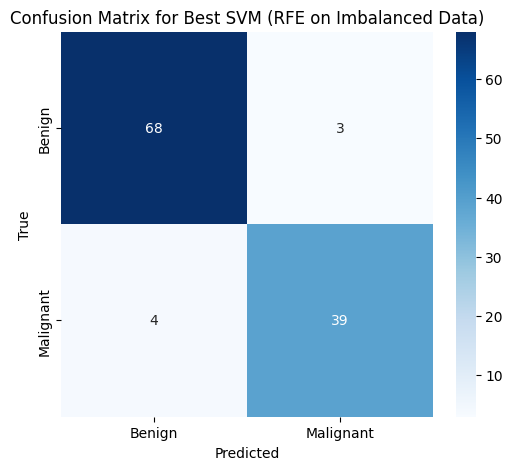

In [ ]:
# Compute the confusion matrix
conf_matrix_best_svm_rfe = confusion_matrix(y_test, y_pred_best_svm_rfe)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_best_svm_rfe, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best SVM (RFE on Imbalanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


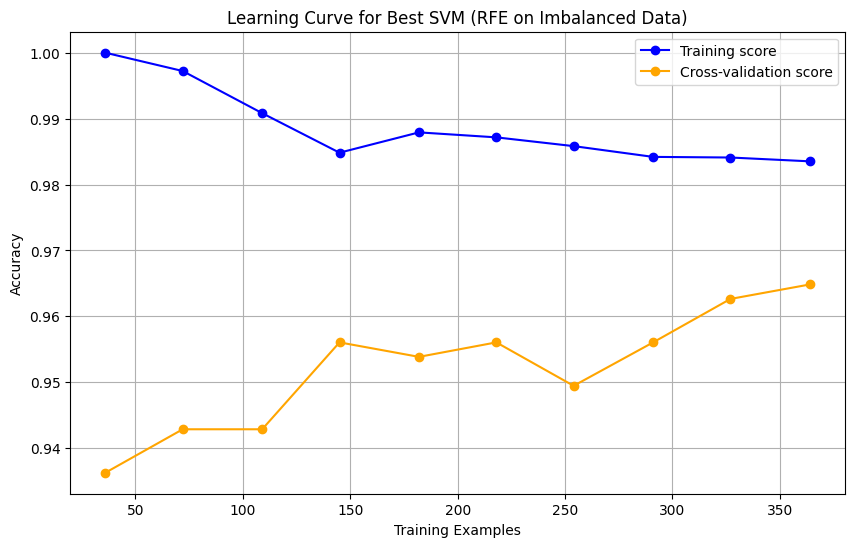

In [ ]:
# Plot the learning curve for for Best SVM (RFE on Imbalanced Data)
plot_learning_curve(best_svm_rfe, X_train_rfe_svm, y_train, cv=5,use_smote=False, title="Learning Curve for Best SVM (RFE on Imbalanced Data)")

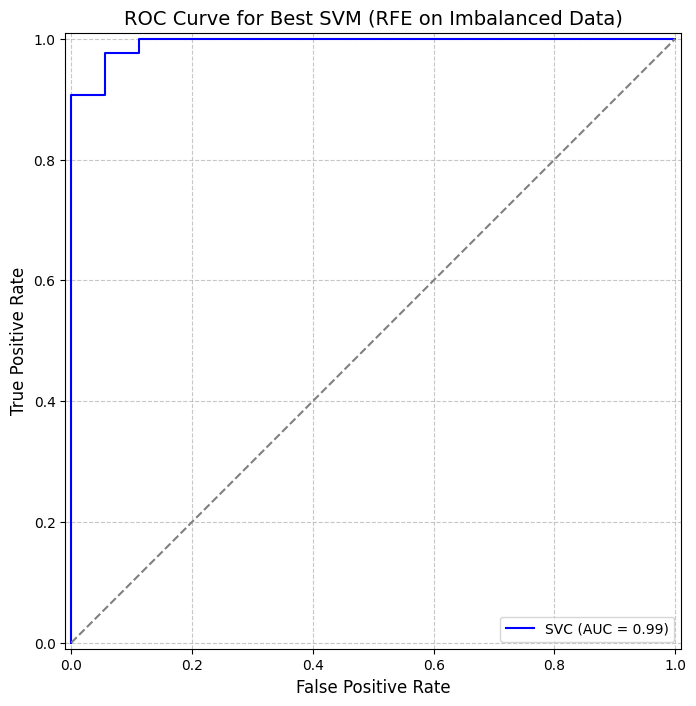

In [ ]:
# Plot the ROC curve for Best SVM (RFE on Imbalanced Data)
plot_roc_curve_on(best_svm_rfe, X_test_rfe_svm, y_test, title="ROC Curve for Best SVM (RFE on Imbalanced Data)")

In [ ]:
# save the model best_svm_rfe in google drive
joblib.dump(best_svm_rfe, '/content/drive/My Drive/best_svm_rfe.pkl')

['/content/drive/My Drive/best_svm_rfe.pkl']

In [ ]:
# Apply SMOTE and Train SVM ###
print("\n----- Training SVM with SMOTE Balanced Data -----")

# Initialize the SMOTE object for synthetic oversampling
smote = SMOTE(random_state=42)  # Random seed for reproducibility

# Apply SMOTE to balance the training data by oversampling the minority class
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print the class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_train_balanced))

# Initialize the SVM classifier with specified hyperparameters
svm_smote = SVC(
    C=0.1,                # Regularization parameter to control overfitting
    random_state=42,      # Random seed for reproducibility
    probability=True      # Enables probability estimates for classification
)

# Train the SVM model on the SMOTE-balanced training data
svm_smote.fit(X_train_balanced, y_train_balanced)

# Perform cross-validation to evaluate the SVM model on the SMOTE-balanced training data
perform_cross_validation(svm_smote, X_train_balanced, y_train_balanced)

# Predict the labels for the test set using the trained SVM model
y_pred_svm_smote = svm_smote.predict(X_test)

# Evaluate the model's accuracy on the test set
print("SVM Accuracy after SMOTE:", accuracy_score(y_test, y_pred_svm_smote))



----- Training SVM with SMOTE Balanced Data -----
Class distribution after SMOTE: Counter({0: 286, 1: 286})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Cross-validation scores (f1): [0.97345133 0.96491228 0.96363636 0.93220339 0.93693694]
Average cross-validation score (f1): 0.9542
SVM Accuracy after SMOTE: 0.956140350877193


In [ ]:
# Print a detailed classification report after SMOTE (SVM)
print("Classification Report after SMOTE (SVM):\n",
      classification_report(y_test, y_pred_svm_smote, target_names=['Benign', 'Malignant']))

Classification Report after SMOTE (SVM):
               precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        71
   Malignant       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



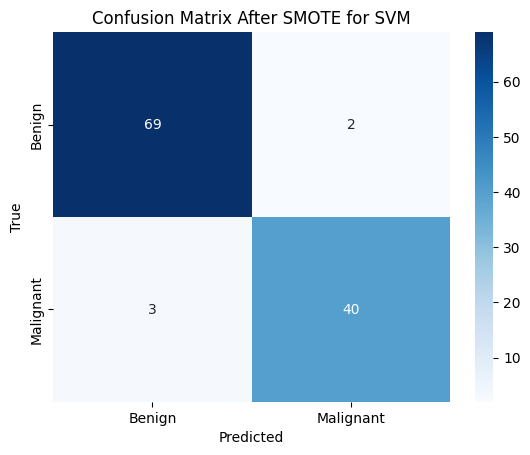

In [ ]:
# Compute the confusion matrix
conf_matrix_svm_smote = confusion_matrix(y_test, y_pred_svm_smote)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix_svm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix After SMOTE for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


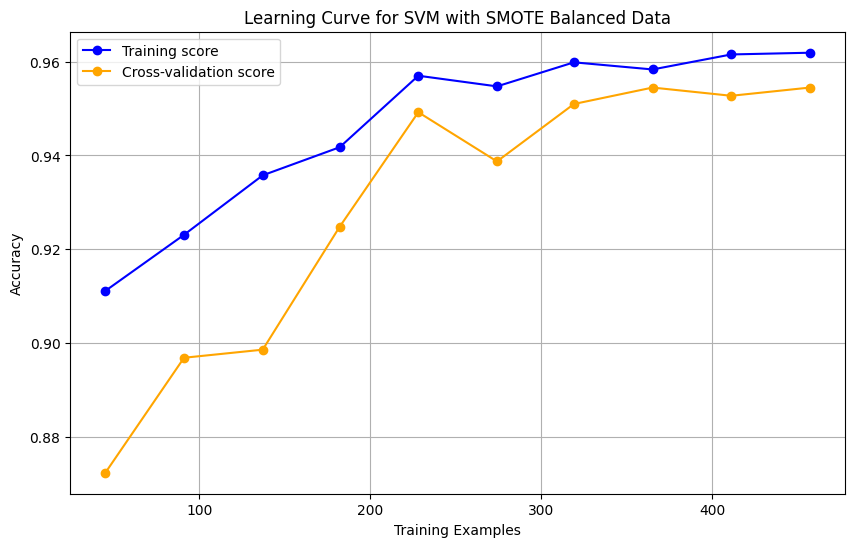

In [ ]:
# Plot the learning curve for SVM with SMOTE Balanced Data
plot_learning_curve(svm_smote, X_train_balanced, y_train_balanced, cv=5,use_smote=True, title="Learning Curve for SVM with SMOTE Balanced Data")

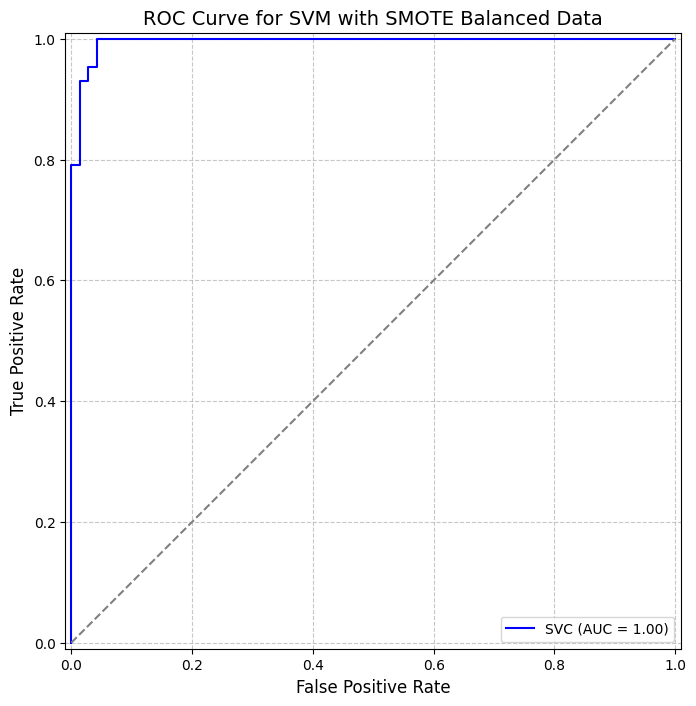

In [ ]:
# Plot the ROC curve for SVM with SMOTE Balanced Data
plot_roc_curve_on(svm_smote, X_test, y_test, title="ROC Curve for SVM with SMOTE Balanced Data")

In [ ]:
print("\n----- Training with Best parameters for SVM (SMOTE Balanced Data) -----")
# Initialize GridSearchCV for hyperparameter tuning of SVM on SMOTE-balanced data
grid_svm_smote = GridSearchCV(
    estimator=SVC(random_state=42, probability=True),  # SVM model with probability estimates enabled
    param_grid=param_grid_svm,                         # Predefined hyperparameter grid for tuning
    cv=5,                                              # 5-fold cross-validation for model evaluation
    scoring='accuracy',                                # Accuracy as the evaluation metric
    n_jobs=-1                                          # Use all available processors for faster computation
)

# Fit the GridSearchCV object to the SMOTE-balanced training data
grid_svm_smote.fit(X_train_balanced, y_train_balanced)

# Print the best hyperparameter combination found during the grid search
print("Best parameters for SVM (SMOTE Balanced Data):", grid_svm_smote.best_params_)

# Print the best cross-validated accuracy achieved with the best hyperparameters
print("Best cross-validated accuracy (SMOTE Balanced Data):", grid_svm_smote.best_score_)

# Retrieve the best SVM model (optimized hyperparameters)
best_svm_smote = grid_svm_smote.best_estimator_

# Train the best model on the SMOTE-balanced training data
best_svm_smote.fit(X_train_balanced, y_train_balanced)

# Perform cross-validation to evaluate the best SVM model on the SMOTE-balanced training data
perform_cross_validation(best_svm_smote, X_train_balanced, y_train_balanced)

# Predict the labels for the original test set using the tuned SVM model
y_pred_best_svm_smote = best_svm_smote.predict(X_test)



----- Training with Best parameters for SVM (SMOTE Balanced Data) -----
Best parameters for SVM (SMOTE Balanced Data): {'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validated accuracy (SMOTE Balanced Data): 0.9843020594965676
Cross-validation scores (f1): [1.         0.98275862 0.97345133 0.99130435 0.96363636]
Average cross-validation score (f1): 0.9822


In [ ]:
# Print the detailed classification report for Best SVM (SMOTE Balanced Data)
print("Classification Report for Best SVM (SMOTE Balanced Data):\n",
      classification_report(y_test, y_pred_best_svm_smote, target_names=['Benign', 'Malignant']))

Classification Report for Best SVM (SMOTE Balanced Data):
               precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        71
   Malignant       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



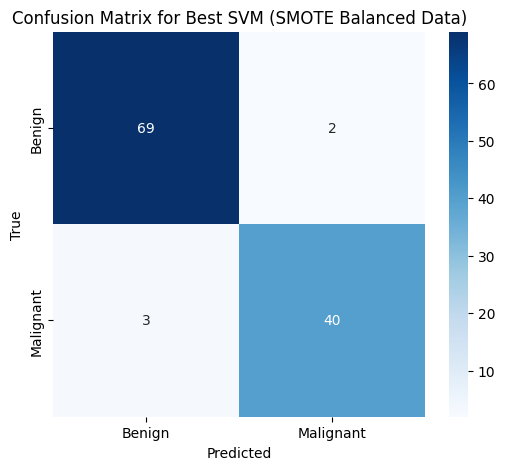

In [ ]:
# Compute the confusion matrix
conf_matrix_best_svm_smote = confusion_matrix(y_test, y_pred_best_svm_smote)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_best_svm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best SVM (SMOTE Balanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


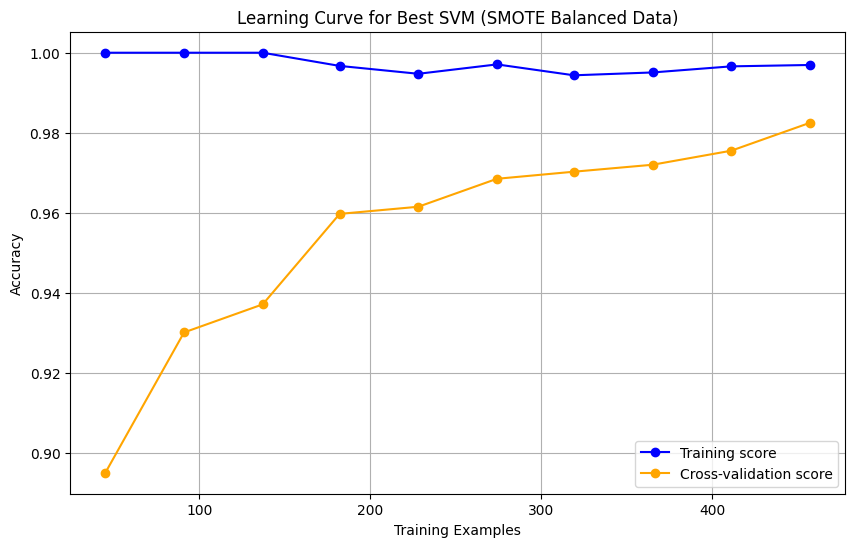

In [ ]:
# Plot the learning curve for the Best SVM (SMOTE Balanced Data)
plot_learning_curve(best_svm_smote, X_train_balanced, y_train_balanced, cv=5,use_smote=True, title="Learning Curve for Best SVM (SMOTE Balanced Data)")

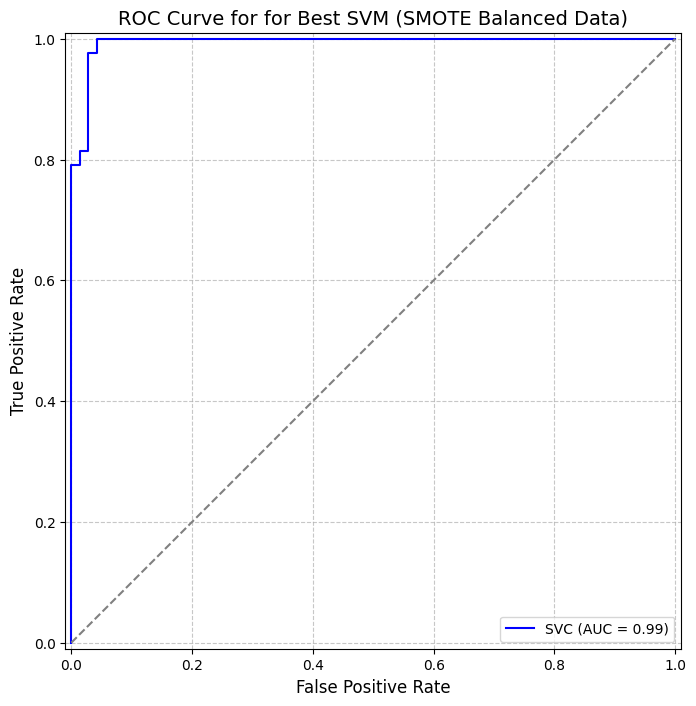

In [ ]:
# Plot the ROC curve for the Best SVM (SMOTE Balanced Data)
plot_roc_curve_on(best_svm_smote, X_test, y_test, title="ROC Curve for for Best SVM (SMOTE Balanced Data)")

In [ ]:
# save the best_svm_smote model in google drive
joblib.dump(best_svm_smote, '/content/drive/My Drive/best_svm_smote.pkl')

['/content/drive/My Drive/best_svm_smote.pkl']

In [ ]:
print("\n----- Training SVM with RFE on SMOTE Balanced Data -----")

# Initialize Recursive Feature Elimination (RFE) with SVM as the base estimator
rfe_selector_svm = RFE(
    estimator=SVC(kernel='linear', random_state=42),  # SVM with linear kernel for feature ranking
    n_features_to_select=10,                          # Retain the top 10 features
    step=1                                            # Remove one feature at a time during each iteration
)

# Fit the RFE selector on the SMOTE-balanced training data
rfe_selector_svm.fit(X_train_balanced, y_train_balanced)

# Transform the SMOTE-balanced training and original test data to retain only the selected features
X_train_rfe_smot_svm = rfe_selector_svm.transform(X_train_balanced)  # RFE-transformed training data
X_test_rfe_smot_svm = rfe_selector_svm.transform(X_test)             # RFE-transformed test data

# Initialize the SVM classifier with specified hyperparameters
svm_rfe_smote = SVC(
    C=0.1,                # Regularization parameter to control overfitting
    random_state=42,      # Random seed for reproducibility
    probability=True      # Enables probability estimates for classification
)

# Train the SVM model on the RFE-transformed SMOTE-balanced training data
svm_rfe_smote.fit(X_train_rfe_smot_svm, y_train_balanced)

# Perform cross-validation to evaluate the SVM model on the RFE-transformed SMOTE-balanced training data
perform_cross_validation(svm_rfe_smote, X_train_rfe_smot_svm, y_train_balanced)

# Predict the labels for the RFE-transformed test data using the trained SVM model
y_pred_rfe_smote_svm = svm_rfe_smote.predict(X_test_rfe_smot_svm)

# Evaluate the model's accuracy on the test set
print("SVM Accuracy (RFE after SMOTE):", accuracy_score(y_test, y_pred_rfe_smote_svm))



----- Training SVM with RFE on SMOTE Balanced Data -----
Cross-validation scores (f1): [0.96428571 0.95652174 0.94545455 0.95652174 0.92727273]
Average cross-validation score (f1): 0.9500
SVM Accuracy (RFE after SMOTE): 0.9473684210526315


In [ ]:
# Print a detailed classification report for (RFE after SMOTE - SVM)
print("Classification Report (RFE after SMOTE - SVM):\n",
      classification_report(y_test, y_pred_rfe_smote_svm, target_names=['Benign', 'Malignant']))

Classification Report (RFE after SMOTE - SVM):
               precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



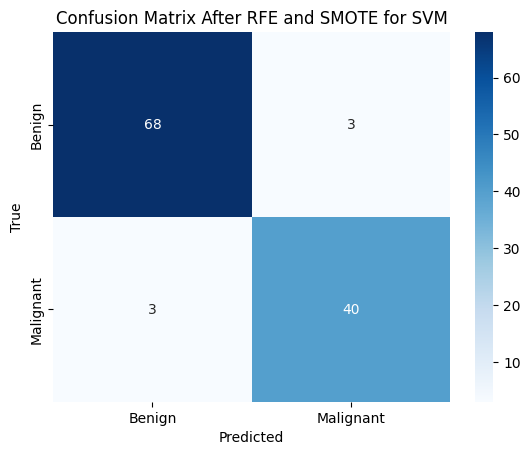

In [ ]:
# Compute the confusion matrix
conf_matrix_rfe_smote_svm = confusion_matrix(y_test, y_pred_rfe_smote_svm)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix_rfe_smote_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix After RFE and SMOTE for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


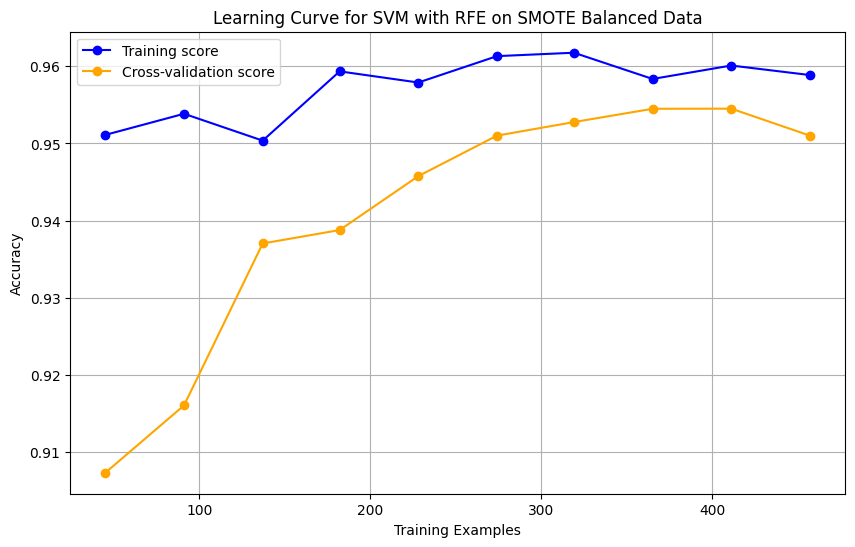

In [ ]:
# Plot the learning curve for SVM with RFE on SMOTE Balanced Data
plot_learning_curve(svm_rfe_smote, X_train_rfe_smot_svm, y_train_balanced, cv=5,use_smote=True, title="Learning Curve for SVM with RFE on SMOTE Balanced Data")

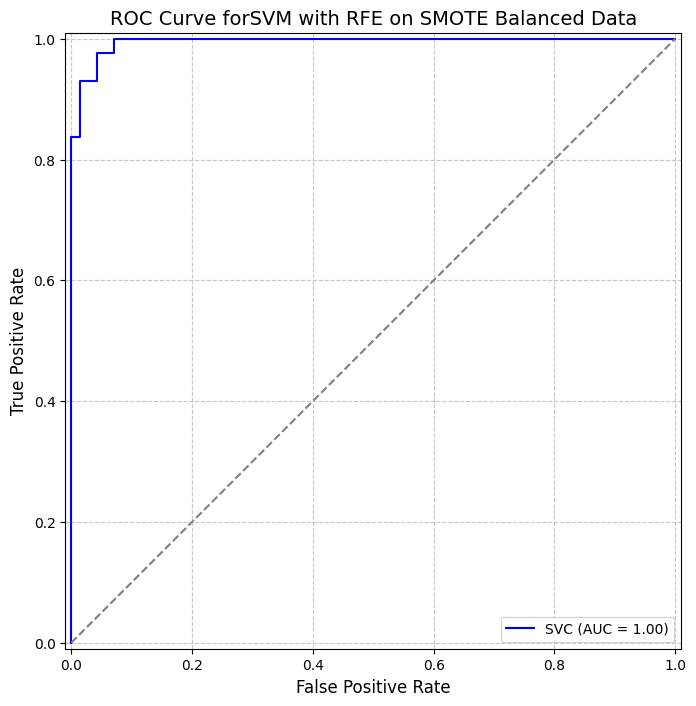

In [ ]:
# Plot the ROC curve for SVM with RFE on SMOTE Balanced Data
plot_roc_curve_on(svm_rfe_smote, X_test_rfe_smot_svm, y_test, title="ROC Curve forSVM with RFE on SMOTE Balanced Data")

In [ ]:
print("\n----- Training with Best parameters for SVM (RFE on SMOTE Balanced Data) -----")
# Hyperparameter Tuning for RFE on SMOTE Balanced Data (SVM)
grid_svm_rfe_smote = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),  # SVM model with probability estimates enabled
    param_grid=param_grid_svm,                         # Predefined hyperparameter grid for tuning
    cv=5,                                              # 5-fold cross-validation for model evaluation
    scoring='accuracy',                                # Accuracy as the evaluation metric
    n_jobs=-1                                          # Use all available processors for faster computation
)

# Fit the GridSearchCV object to the RFE-transformed SMOTE-balanced training data
grid_svm_rfe_smote.fit(X_train_rfe_smot_svm, y_train_balanced)

# Print the best hyperparameter combination found during the grid search
print("Best parameters for SVM (RFE on SMOTE Balanced Data):", grid_svm_rfe_smote.best_params_)

# Print the best cross-validated accuracy achieved with the best hyperparameters
print("Best cross-validated accuracy (RFE on SMOTE Balanced Data):", grid_svm_rfe_smote.best_score_)

# Retrieve the best SVM model (optimized hyperparameters)
best_svm_rfe_smote = grid_svm_rfe_smote.best_estimator_

# Train the best model on the RFE-transformed SMOTE-balanced training data
best_svm_rfe_smote.fit(X_train_rfe_smot_svm, y_train_balanced)

# Perform cross-validation to evaluate the SVM model on the best  RFE-transformed SMOTE-balanced training data
perform_cross_validation(best_svm_rfe_smote, X_train_rfe_smot_svm, y_train_balanced)

# Predict the labels for the RFE-transformed test data using the tuned SVM model
y_pred_best_svm_rfe_smote = best_svm_rfe_smote.predict(X_test_rfe_smot_svm)



----- Training with Best parameters for SVM (RFE on SMOTE Balanced Data) -----
Best parameters for SVM (RFE on SMOTE Balanced Data): {'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validated accuracy (RFE on SMOTE Balanced Data): 0.9825629290617849
Cross-validation scores (f1): [0.99130435 0.98275862 0.96491228 0.99130435 0.95495495]
Average cross-validation score (f1): 0.9770


In [ ]:
# Print the detailed classification report for Best SVM (RFE on SMOTE Balanced Data)
print("Classification Report for Best SVM (RFE on SMOTE Balanced Data):\n",
      classification_report(y_test, y_pred_best_svm_rfe_smote, target_names=['Benign', 'Malignant']))

Classification Report for Best SVM (RFE on SMOTE Balanced Data):
               precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



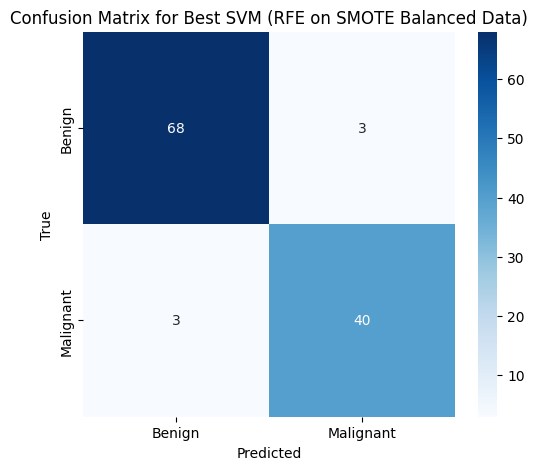

In [ ]:
# Compute the confusion matrix
conf_matrix_best_svm_rfe_smote = confusion_matrix(y_test, y_pred_best_svm_rfe_smote)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_best_svm_rfe_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best SVM (RFE on SMOTE Balanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


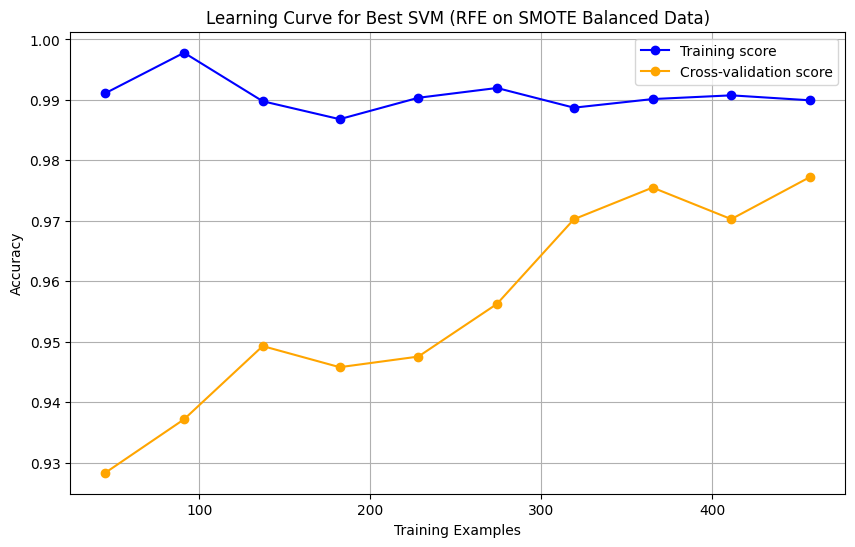

In [ ]:
# Plot the learning curve for the Best SVM (RFE on SMOTE Balanced Data)
plot_learning_curve(best_svm_rfe_smote, X_train_rfe_smot_svm, y_train_balanced,use_smote=True, cv=5, title="Learning Curve for Best SVM (RFE on SMOTE Balanced Data)")

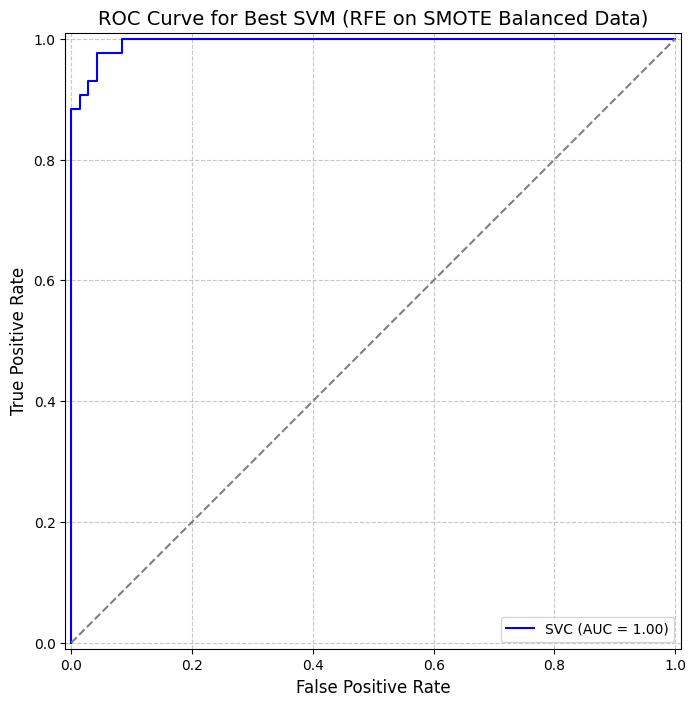

In [ ]:
# Plot the ROC curve for the Best SVM (RFE on SMOTE Balanced Data)
plot_roc_curve_on(best_svm_rfe_smote, X_test_rfe_smot_svm, y_test, title="ROC Curve for Best SVM (RFE on SMOTE Balanced Data)")

In [ ]:
joblib.dump(best_svm_rfe_smote, '/content/drive/My Drive/best_svm_rfe_smote.pkl')

['/content/drive/My Drive/best_svm_rfe_smote.pkl']

In [ ]:
# Load column names from the specified text file
columns_file_path_mamm = '/content/drive/MyDrive/Colab Notebooks/mammographic+mass/column_name_mamm.txt'
with open(columns_file_path_mamm, 'r') as file:
    column_names_mamm = file.read().splitlines()

# Load the main dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/mammographic+mass/mammographic_masses.data'
data_mamm = pd.read_csv(file_path, header=None, names=column_names_mamm)

# Display the first few rows to verify
print(data_mamm.head())


  BI_RADS Age Shape Margin Density  Severity
0       5  67     3      5       3         1
1       4  43     1      1       ?         1
2       5  58     4      5       3         1
3       4  28     1      1       3         0
4       5  74     1      5       ?         1


In [ ]:
print(data_mamm.head())

  BI_RADS Age Shape Margin Density  Severity
0       5  67     3      5       3         1
1       4  43     1      1       ?         1
2       5  58     4      5       3         1
3       4  28     1      1       3         0
4       5  74     1      5       ?         1


In [ ]:
import numpy as np
import pandas as pd

# Convert placeholders like '?' to NaN
data_mamm.replace('?', np.nan, inplace=True)

#Count NaN values in each column
nan_count = data_mamm.isna().sum()

# Print the count of NaN values for each column
print(nan_count)


BI_RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64


In [ ]:
# Calculate the proportion of missing values for each column
missing_proportion = data_mamm.isna().sum() / len(data_mamm)
print(missing_proportion)


BI_RADS     0.002081
Age         0.005203
Shape       0.032258
Margin      0.049948
Density     0.079084
Severity    0.000000
dtype: float64


In [ ]:
# Loop through the categorical columns and fill missing values with mode
categorical_columns = ['BI_RADS', 'Age', 'Shape', 'Margin', 'Density']

for column in categorical_columns:
    # Calculate the mode value
    mode_value = data_mamm[column].mode()[0]  # Get the mode
    # Fill missing values and assign it back to the DataFrame
    data_mamm[column] = data_mamm[column].fillna(mode_value)

In [ ]:
# Convert Age to numeric after filling missing values, if applicable
data_mamm['Age'] = pd.to_numeric(data_mamm['Age'], errors='coerce')


In [ ]:
# Verify if there are any remaining missing values for Mammographic data
missing_values = data_mamm.isnull().sum()
print(missing_values)


BI_RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64


In [ ]:
print(data_mamm.dtypes)

BI_RADS     object
Age          int64
Shape       object
Margin      object
Density     object
Severity     int64
dtype: object


In [ ]:
data_mamm

BI_RADS  Age Shape Margin Density  Severity
0         5   67     3      5       3         1
1         4   43     1      1       3         1
2         5   58     4      5       3         1
3         4   28     1      1       3         0
4         5   74     1      5       3         1
..      ...  ...   ...    ...     ...       ...
956       4   47     2      1       3         0
957       4   56     4      5       3         1
958       4   64     4      5       3         0
959       5   66     4      5       3         1
960       4   62     3      3       3         0

[961 rows x 6 columns]

In [ ]:
data_mamm.shape
data_mamm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BI_RADS   961 non-null    object
 1   Age       961 non-null    int64 
 2   Shape     961 non-null    object
 3   Margin    961 non-null    object
 4   Density   961 non-null    object
 5   Severity  961 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 45.2+ KB


In [ ]:
malig_count_mamm = data_mamm['Severity'].value_counts().get(1)
begn_count_mamm = data_mamm['Severity'].value_counts().get(0)

print('Num of malignant cases:', malig_count_mamm)
print('Num of benign cases:', begn_count_mamm)


Num of malignant cases: 445
Num of benign cases: 516


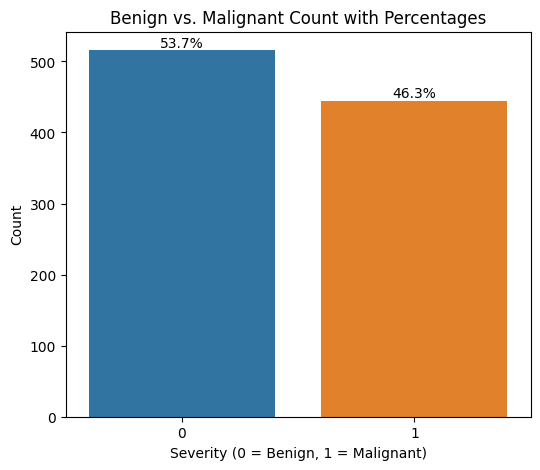

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
# Use hue instead of x for the color palette
ax_mamm = sns.countplot(data=data_mamm, x='Severity', hue='Severity', palette=["#1f77b4", "#ff7f0e"], legend=False)
total = len(data_mamm)

# Add percentage labels above each bar
for p in ax_mamm.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"
    ax_mamm.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Benign vs. Malignant Count with Percentages')
plt.xlabel('Severity (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()


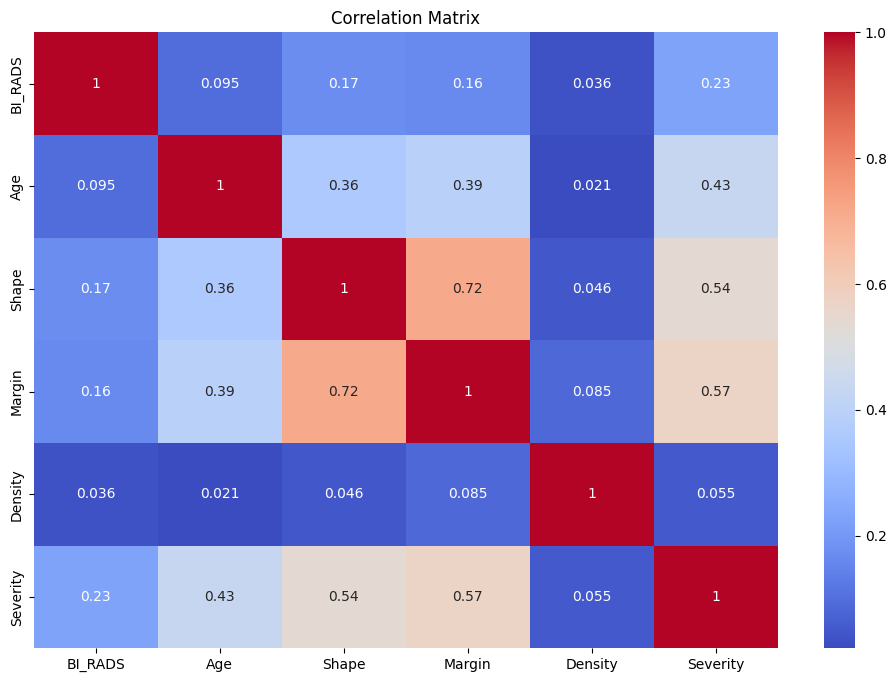

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for multicollinearity with a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_mamm.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Drop the BI-RADS column (non-predictive)
data_mamm.drop(columns=['BI_RADS'], inplace=True)

In [ ]:
data_mamm

Age Shape Margin Density  Severity
0     67     3      5       3         1
1     43     1      1       3         1
2     58     4      5       3         1
3     28     1      1       3         0
4     74     1      5       3         1
..   ...   ...    ...     ...       ...
956   47     2      1       3         0
957   56     4      5       3         1
958   64     4      5       3         0
959   66     4      5       3         1
960   62     3      3       3         0

[961 rows x 5 columns]

In [ ]:
# Convert relevant columns to categorical types
data_mamm['Shape'] = data_mamm['Shape'].astype('category')
data_mamm['Margin'] = data_mamm['Margin'].astype('category')
data_mamm['Density'] = data_mamm['Density'].astype('category')

In [ ]:

# Convert categorical columns to their numeric codes for aggregation
data_mamm['Shape'] = data_mamm['Shape'].cat.codes
data_mamm['Margin'] = data_mamm['Margin'].cat.codes
data_mamm['Density'] = data_mamm['Density'].cat.codes

# Now you can group by and calculate mean
mean_values = data_mamm.groupby('Severity').mean()
print(mean_values)


                Age     Shape    Margin   Density
Severity                                         
0         49.713178  1.139535  0.872093  1.899225
1         62.222472  2.485393  2.674157  1.939326


In [ ]:
# Convert relevant columns to categorical types
data_mamm['Shape'] = data_mamm['Shape'].astype('category')
data_mamm['Margin'] = data_mamm['Margin'].astype('category')

In [ ]:
data_mamm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Age       961 non-null    int64   
 1   Shape     961 non-null    category
 2   Margin    961 non-null    category
 3   Density   961 non-null    int8    
 4   Severity  961 non-null    int64   
dtypes: category(2), int64(2), int8(1)
memory usage: 18.2 KB


In [ ]:
data_mamm.describe()

Age     Density    Severity
count  961.000000  961.000000  961.000000
mean    55.505723    1.917794    0.463059
std     14.444586    0.365869    0.498893
min     18.000000    0.000000    0.000000
25%     45.000000    2.000000    0.000000
50%     57.000000    2.000000    0.000000
75%     66.000000    2.000000    1.000000
max     96.000000    3.000000    1.000000

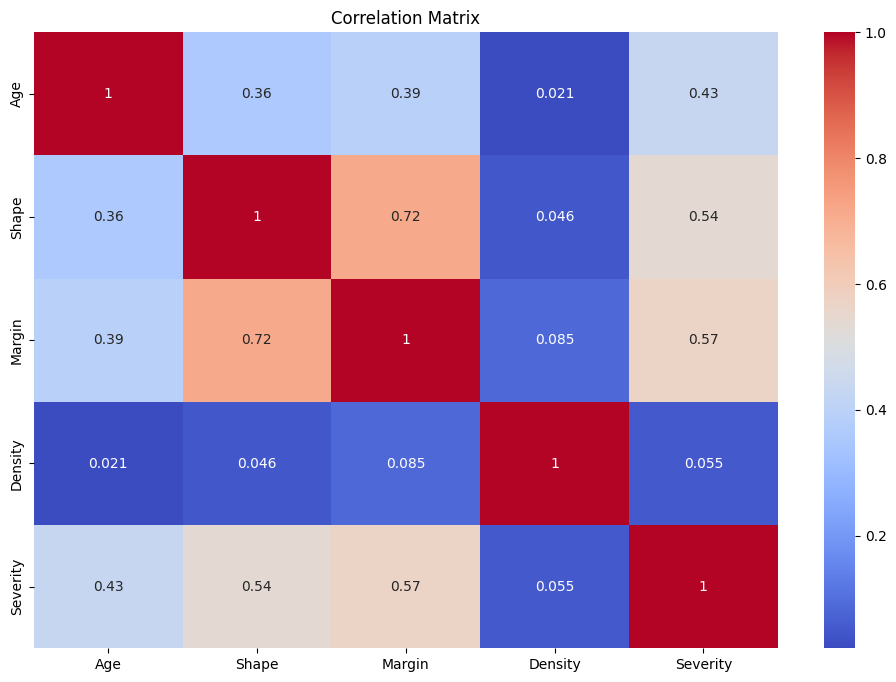

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for multicollinearity with a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_mamm.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Define feature matrix and target variable
X_mamm = data_mamm.drop(columns=['Severity'])
y_mamm = data_mamm['Severity']

In [ ]:
# Step 1: Standardize the 'Age' column
scaler = StandardScaler()
age_scaled = scaler.fit_transform(X_mamm[['Age']])
age_scaled = pd.DataFrame(age_scaled, columns=['Age'])
density_scaled = scaler.fit_transform(X_mamm[['Density']])
density_scaled = pd.DataFrame(density_scaled, columns=['Density'])

In [ ]:

# Step 2: One-Hot Encode 'Shape', 'Margin', and 'Density'
from sklearn.preprocessing import StandardScaler, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None)  # drop='first' to avoid dummy variable trap if needed
categorical_encoded = encoder.fit_transform(X_mamm[['Shape', 'Margin']])

# Convert the encoded array to a DataFrame with proper column names
categorical_encoded = pd.DataFrame(
    categorical_encoded,
    columns=encoder.get_feature_names_out(['Shape', 'Margin'])
)

# Step 3: Concatenate scaled 'Age' and encoded categorical features
X_transformed = pd.concat([age_scaled,density_scaled, categorical_encoded], axis=1)

In [ ]:
print(X_transformed.head())


        Age   Density  Shape_0  Shape_1  Shape_2  Shape_3  Margin_0  Margin_1  \
0  0.796164  0.224804      0.0      0.0      1.0      0.0       0.0       0.0   
1 -0.866223  0.224804      1.0      0.0      0.0      0.0       1.0       0.0   
2  0.172769  0.224804      0.0      0.0      0.0      1.0       0.0       0.0   
3 -1.905215  0.224804      1.0      0.0      0.0      0.0       1.0       0.0   
4  1.281027  0.224804      1.0      0.0      0.0      0.0       0.0       0.0   

   Margin_2  Margin_3  Margin_4  
0       0.0       0.0       1.0  
1       0.0       0.0       0.0  
2       0.0       0.0       1.0  
3       0.0       0.0       0.0  
4       0.0       0.0       1.0  


In [ ]:
X_train_mamm, X_test_mamm, y_train_mamm, y_test_mamm = train_test_split(X_transformed, y_mamm, test_size=0.2, random_state=42)



----- Training Random Forest on Imbalanced Data Mamm0 -----
Cross-validation scores (f1): [0.82051282 0.73239437 0.78709677 0.78709677 0.74418605]
Average cross-validation score (f1): 0.7743
Random Forest Accuracy (Imbalanced Data): 0.8238341968911918
Classification Report (Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.88      0.77      0.82       101
   Malignant       0.78      0.88      0.83        92

    accuracy                           0.82       193
   macro avg       0.83      0.83      0.82       193
weighted avg       0.83      0.82      0.82       193



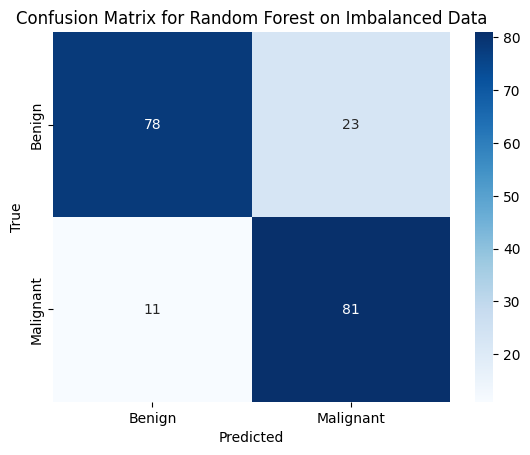

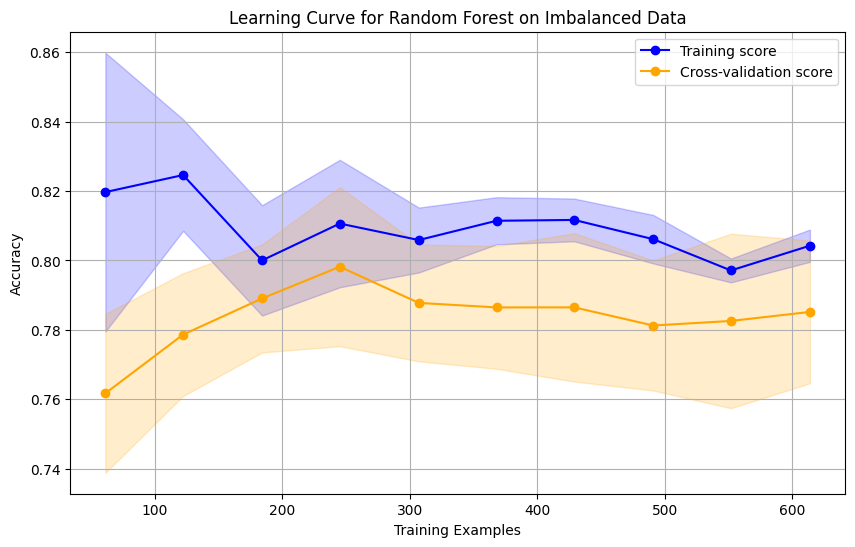

In [ ]:
print("\n----- Training Random Forest on Imbalanced Data Mamm0 -----")
rf_mamm = RandomForestClassifier(n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42)
rf_mamm.fit(X_train_mamm, y_train_mamm)
perform_cross_validation(rf_mamm, X_train_mamm, y_train_mamm)
y_pred_rf_mamm = rf_mamm.predict(X_test_mamm)
print("Random Forest Accuracy (Imbalanced Data):", accuracy_score(y_test_mamm, y_pred_rf_mamm))
print("Classification Report (Imbalanced Data):\n", classification_report(y_test_mamm, y_pred_rf_mamm, target_names=['Benign', 'Malignant']))
conf_matrix_rf_mamm = confusion_matrix(y_test_mamm, y_pred_rf_mamm)
sns.heatmap(conf_matrix_rf_mamm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Random Forest on Imbalanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plot_learning_curve(rf_mamm, X_train_mamm, y_train_mamm, cv=5,use_smote=False, title="Learning Curve for Random Forest on Imbalanced Data")


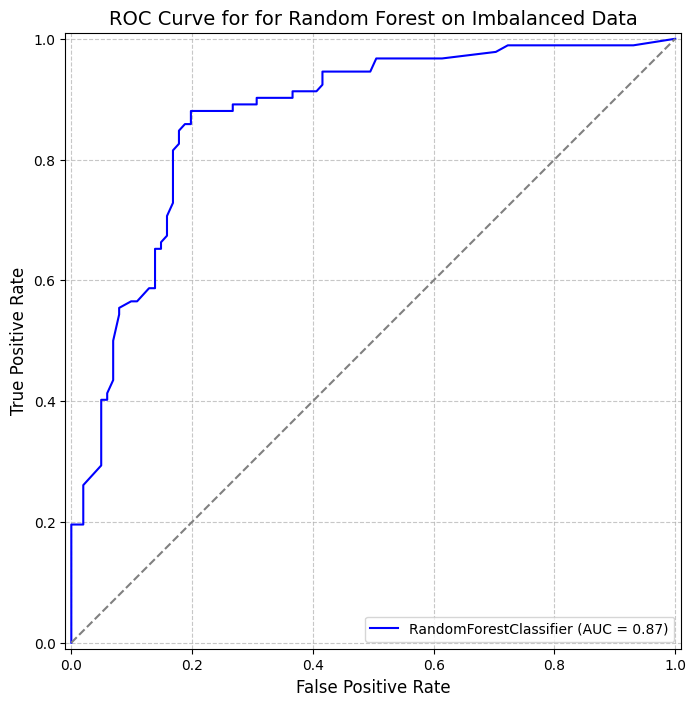

In [ ]:
plot_roc_curve_on(rf_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for for Random Forest on Imbalanced Data")


----- Hyperparameter Tuning for Random Forest on Imbalanced Data -----


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest (Imbalanced Data): {'max_depth': 7, 'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 50}
Best cross-validated accuracy (Imbalanced Data): 0.8020711314828961


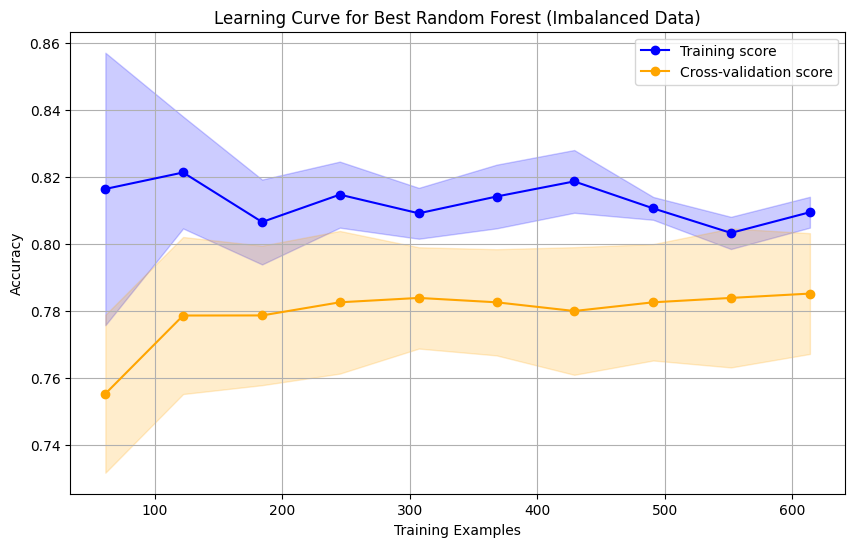

In [ ]:
# Hyperparameter Tuning for Imbalanced Data ###
print("\n----- Hyperparameter Tuning for Random Forest on Imbalanced Data -----")
grid_rf_imbalanced_mamm = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                        param_grid=param_grid_rf,
                                        cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_imbalanced_mamm.fit(X_train_mamm, y_train_mamm)

# Print the best parameters and score for the imbalanced dataset
print("Best parameters for Random Forest (Imbalanced Data):", grid_rf_imbalanced_mamm.best_params_)
print("Best cross-validated accuracy (Imbalanced Data):", grid_rf_imbalanced_mamm.best_score_)

# Train the model with the best parameters
best_rf_imbalanced_mamm = grid_rf_imbalanced_mamm.best_estimator_
best_rf_imbalanced_mamm.fit(X_train_mamm, y_train_mamm)
plot_learning_curve(best_rf_imbalanced_mamm, X_train_mamm, y_train_mamm, cv=5,use_smote=False, title="Learning Curve for Best Random Forest (Imbalanced Data)")

In [ ]:
joblib.dump(best_rf_imbalanced_mamm, '/content/drive/My Drive/best_rf_imbalanced_mamm.pkl')

['/content/drive/My Drive/best_rf_imbalanced_mamm.pkl']

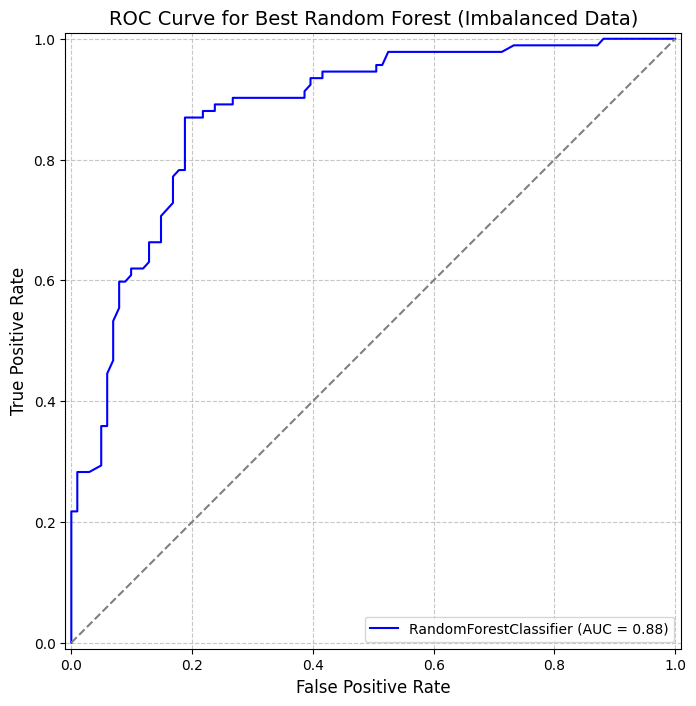

In [ ]:
plot_roc_curve_on(best_rf_imbalanced_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for Best Random Forest (Imbalanced Data)")


----- Training Random Forest with SMOTE Balanced Data Mammo-----
Class distribution after SMOTE: Counter({0: 415, 1: 415})
Cross-validation scores (f1): [0.81355932 0.81656805 0.75581395 0.83060109 0.81481481]
Average cross-validation score (f1): 0.8063
Random Forest Accuracy (SMOTE Balanced Data): 0.8186528497409327
Classification Report (SMOTE Balanced Data):
               precision    recall  f1-score   support

      Benign       0.88      0.76      0.81       101
   Malignant       0.77      0.88      0.82        92

    accuracy                           0.82       193
   macro avg       0.82      0.82      0.82       193
weighted avg       0.83      0.82      0.82       193



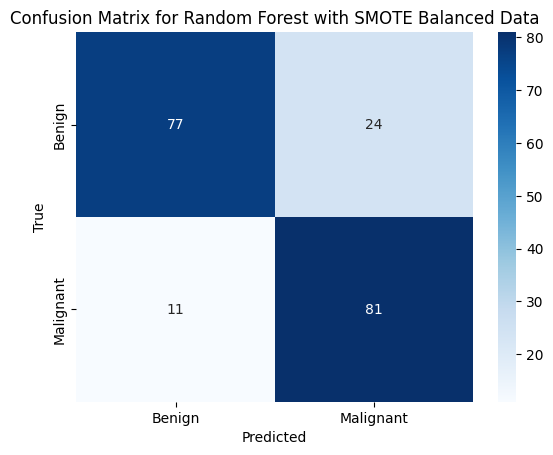

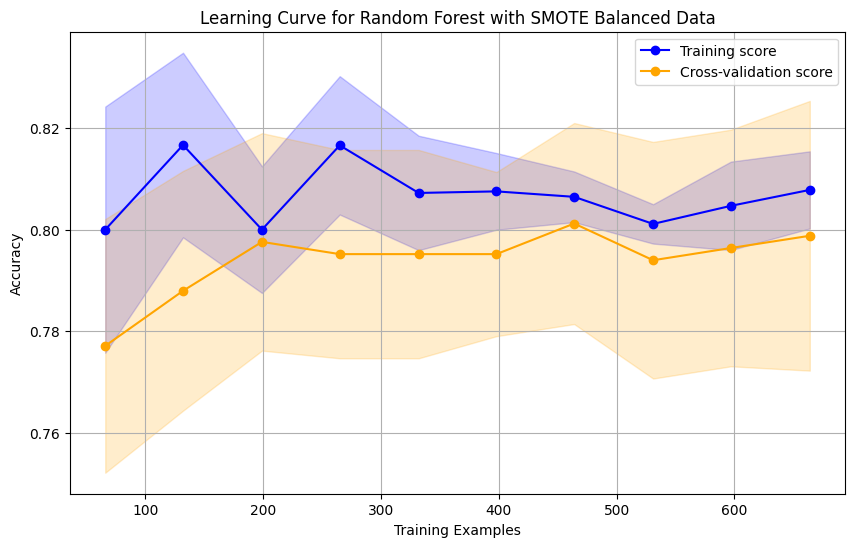

In [ ]:
print("\n----- Training Random Forest with SMOTE Balanced Data Mammo-----")
smote_mamm = SMOTE(random_state=42)
X_train_balanced_mamm, y_train_balanced_mamm = smote_mamm.fit_resample(X_train_mamm, y_train_mamm)
print("Class distribution after SMOTE:", Counter(y_train_balanced_mamm))

rf_smote_mamm = RandomForestClassifier(n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42)
rf_smote_mamm.fit(X_train_balanced_mamm, y_train_balanced_mamm)
perform_cross_validation(rf_smote_mamm, X_train_balanced_mamm, y_train_balanced_mamm)
y_pred_smote_rf_mamm = rf_smote_mamm.predict(X_test_mamm)
print("Random Forest Accuracy (SMOTE Balanced Data):", accuracy_score(y_test_mamm, y_pred_smote_rf_mamm))
print("Classification Report (SMOTE Balanced Data):\n", classification_report(y_test_mamm, y_pred_smote_rf_mamm, target_names=['Benign', 'Malignant']))
conf_matrix_smote_rf_mamm = confusion_matrix(y_test_mamm, y_pred_smote_rf_mamm)
sns.heatmap(conf_matrix_smote_rf_mamm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Random Forest with SMOTE Balanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plot_learning_curve(rf_smote_mamm, X_train_balanced_mamm, y_train_balanced_mamm, cv=5,use_smote=True, title="Learning Curve for Random Forest with SMOTE Balanced Data")


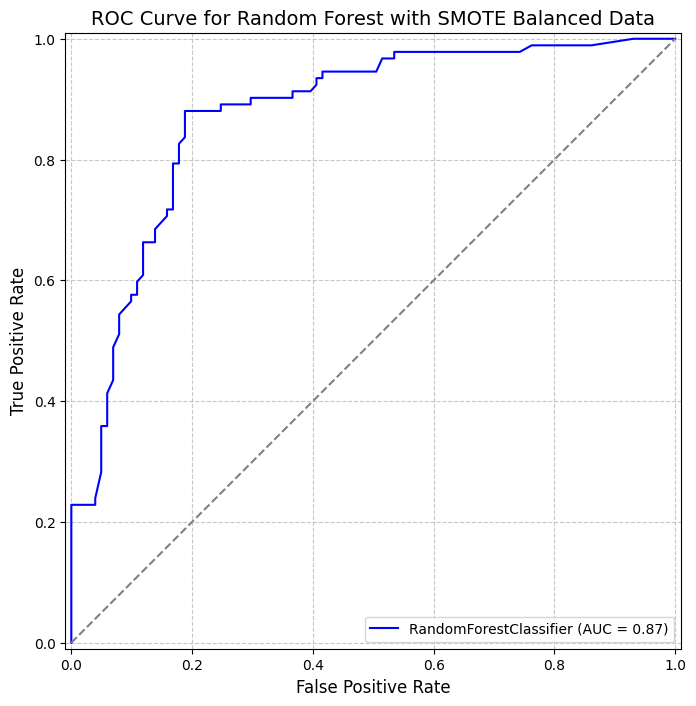

In [ ]:
plot_roc_curve_on(rf_smote_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for Random Forest with SMOTE Balanced Data")


----- Hyperparameter Tuning for Random Forest on SMOTE Balanced Data -----


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest (SMOTE Balanced Data): {'max_depth': 7, 'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 50}
Best cross-validated accuracy (SMOTE Balanced Data): 0.8048192771084338


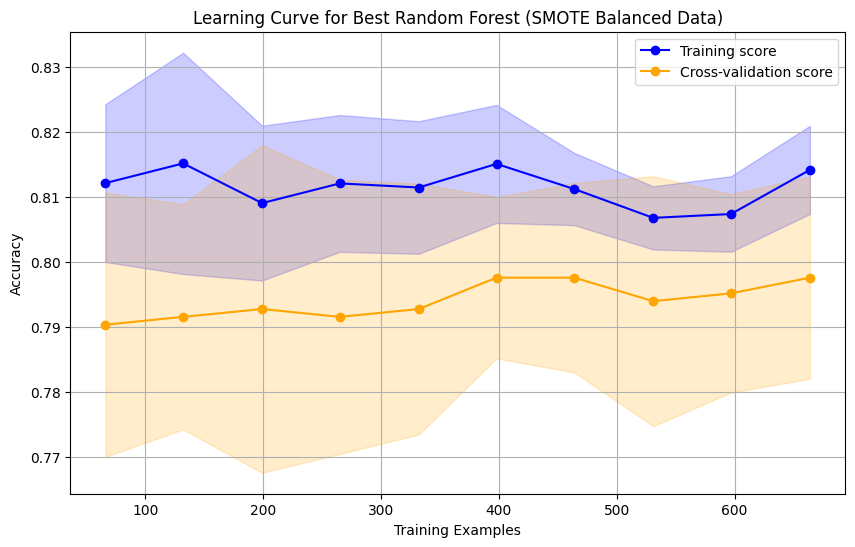

In [ ]:
## Hyperparameter Tuning for SMOTE Balanced Data ###
print("\n----- Hyperparameter Tuning for Random Forest on SMOTE Balanced Data -----")
smote = SMOTE(random_state=42)
X_train_balanced_mamm, y_train_balanced_mamm = smote.fit_resample(X_train_mamm, y_train_mamm)

grid_rf_smote_mamm = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid_rf,
                                   cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_smote_mamm.fit(X_train_balanced_mamm, y_train_balanced_mamm)

# Print the best parameters and score for the SMOTE balanced dataset
print("Best parameters for Random Forest (SMOTE Balanced Data):", grid_rf_smote_mamm.best_params_)
print("Best cross-validated accuracy (SMOTE Balanced Data):", grid_rf_smote_mamm.best_score_)

# Train the model with the best parameters
best_rf_smote_mamm = grid_rf_smote_mamm.best_estimator_
best_rf_smote_mamm.fit(X_train_balanced_mamm, y_train_balanced_mamm)
plot_learning_curve(best_rf_smote_mamm, X_train_balanced_mamm, y_train_balanced_mamm, cv=5,use_smote=True, title="Learning Curve for Best Random Forest (SMOTE Balanced Data)")

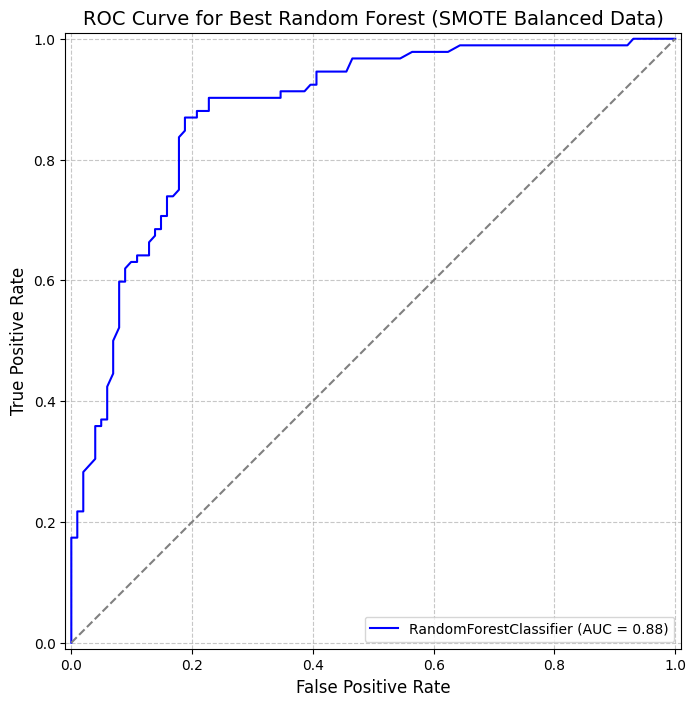

In [ ]:
plot_roc_curve_on(best_rf_smote_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for Best Random Forest (SMOTE Balanced Data)")

In [ ]:
joblib.dump(best_rf_smote_mamm, '/content/drive/My Drive/best_rf_smote_mamm.pkl')

['/content/drive/My Drive/best_rf_smote_mamm.pkl']

In [ ]:
# Train SVM on Imbalanced Data ###
print("\n----- Training SVM on Imbalanced Data -----")
svm_mamm = SVC(C=0.1, random_state=42, probability=True)
svm_mamm.fit(X_train_mamm, y_train_mamm)
perform_cross_validation(svm_mamm, X_train_mamm, y_train_mamm)
y_pred_svm_mamm = svm_mamm.predict(X_test_mamm)



----- Training SVM on Imbalanced Data -----
Cross-validation scores (f1): [0.82051282 0.70676692 0.7483871  0.79738562 0.66115702]
Average cross-validation score (f1): 0.7468


In [ ]:

print("SVM Accuracy (Imbalanced Data):", accuracy_score(y_test_mamm, y_pred_svm_mamm))
print("Classification Report (Imbalanced Data - SVM):\n", classification_report(y_test_mamm, y_pred_svm_mamm, target_names=['Benign', 'Malignant']))

SVM Accuracy (Imbalanced Data): 0.7927461139896373
Classification Report (Imbalanced Data - SVM):
               precision    recall  f1-score   support

      Benign       0.81      0.78      0.80       101
   Malignant       0.77      0.80      0.79        92

    accuracy                           0.79       193
   macro avg       0.79      0.79      0.79       193
weighted avg       0.79      0.79      0.79       193



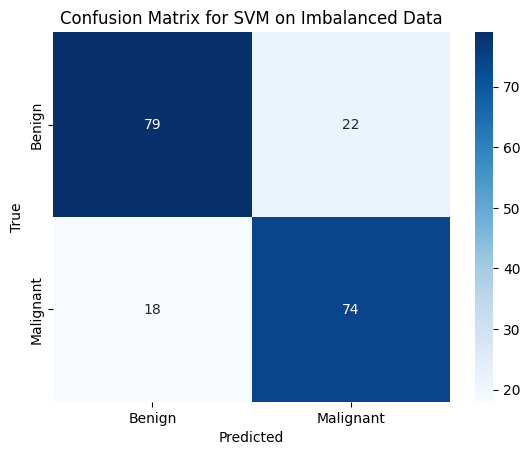

In [ ]:
conf_matrix_svm_mamm = confusion_matrix(y_test_mamm, y_pred_svm_mamm)
sns.heatmap(conf_matrix_svm_mamm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for SVM on Imbalanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

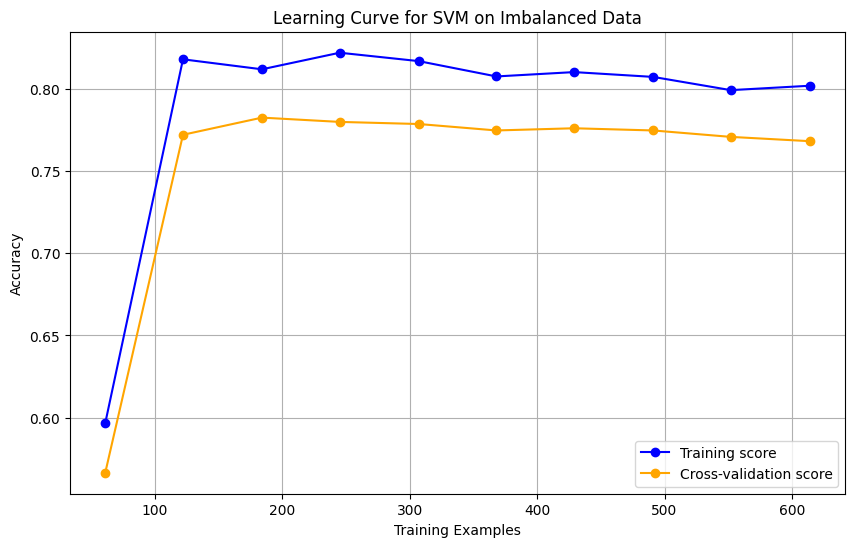

In [ ]:
plot_learning_curve(svm_mamm, X_train_mamm, y_train_mamm, cv=5,use_smote=False, title="Learning Curve for SVM on Imbalanced Data")

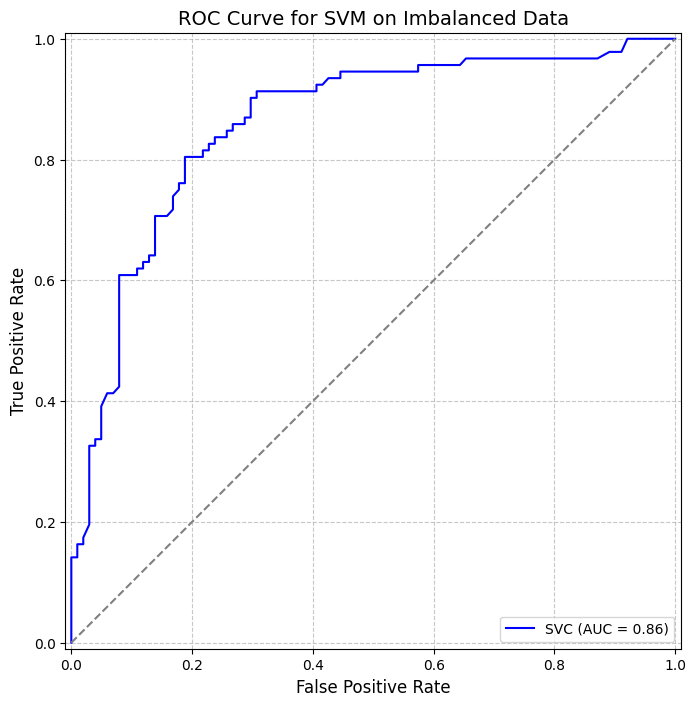

In [ ]:
plot_roc_curve_on(svm_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for SVM on Imbalanced Data")

In [ ]:
# Hyperparameter Tuning for Imbalanced Data (SVM) Mamm ###
print("\n----- Hyperparameter Tuning for SVM on Imbalanced Data -----")
random_svm_imbalanced_mamm = RandomizedSearchCV(estimator=SVC(random_state=42,probability=True),
                                        param_distributions=param_grid_svm,
                                        n_iter=50,  # Number of parameter settings sampled
                                        cv=5, scoring='accuracy',
                                        n_jobs=-1)
random_svm_imbalanced_mamm.fit(X_train_mamm, y_train_mamm)

# Print the best parameters and score for the imbalanced dataset
print("Best parameters for SVM (Imbalanced Data):", random_svm_imbalanced_mamm.best_params_)
print("Best cross-validated accuracy (Imbalanced Data):", random_svm_imbalanced_mamm.best_score_)

# Train the model with the best parameters
best_svm_imbalanced_mamm = random_svm_imbalanced_mamm.best_estimator_
best_svm_imbalanced_mamm.fit(X_train_mamm, y_train_mamm)
perform_cross_validation(best_svm_imbalanced_mamm, X_train_mamm, y_train_mamm)
y_pred_best_svm_mamm = best_svm_imbalanced_mamm.predict(X_test_mamm)




----- Hyperparameter Tuning for SVM on Imbalanced Data -----
Best parameters for SVM (Imbalanced Data): {'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 3, 'class_weight': None, 'C': 1}
Best cross-validated accuracy (Imbalanced Data): 0.7968508615567439
Cross-validation scores (f1): [0.83116883 0.75675676 0.78205128 0.78709677 0.72868217]
Average cross-validation score (f1): 0.7772


In [ ]:
print("SVM Accuracy (best svm Imbalanced Data):", accuracy_score(y_test_mamm, y_pred_best_svm_mamm))
print("Classification Report (best svm Imbalanced Data - SVM):\n", classification_report(y_test_mamm, y_pred_best_svm_mamm, target_names=['Benign', 'Malignant']))

SVM Accuracy (best svm Imbalanced Data): 0.8186528497409327
Classification Report (best svm Imbalanced Data - SVM):
               precision    recall  f1-score   support

      Benign       0.88      0.76      0.81       101
   Malignant       0.77      0.88      0.82        92

    accuracy                           0.82       193
   macro avg       0.82      0.82      0.82       193
weighted avg       0.83      0.82      0.82       193



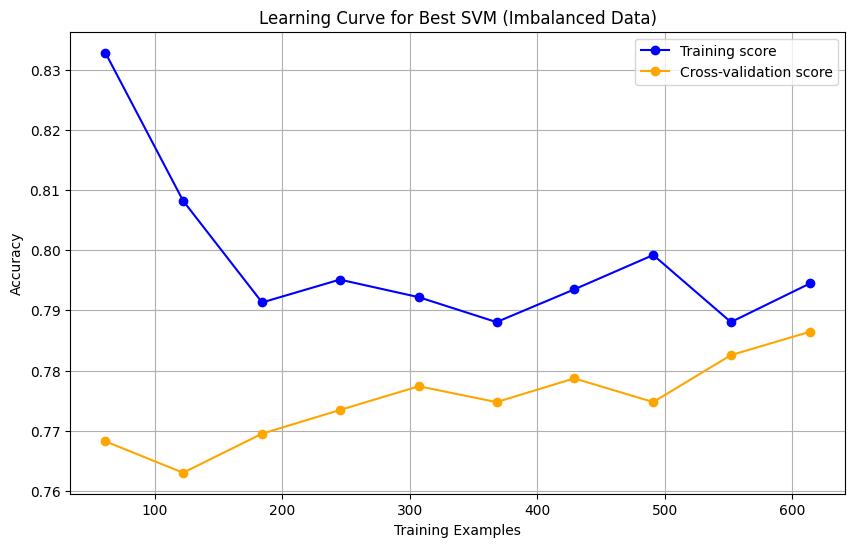

In [ ]:
plot_learning_curve(best_svm_imbalanced_mamm, X_train_mamm, y_train_mamm, cv=5, title="Learning Curve for Best SVM (Imbalanced Data)")

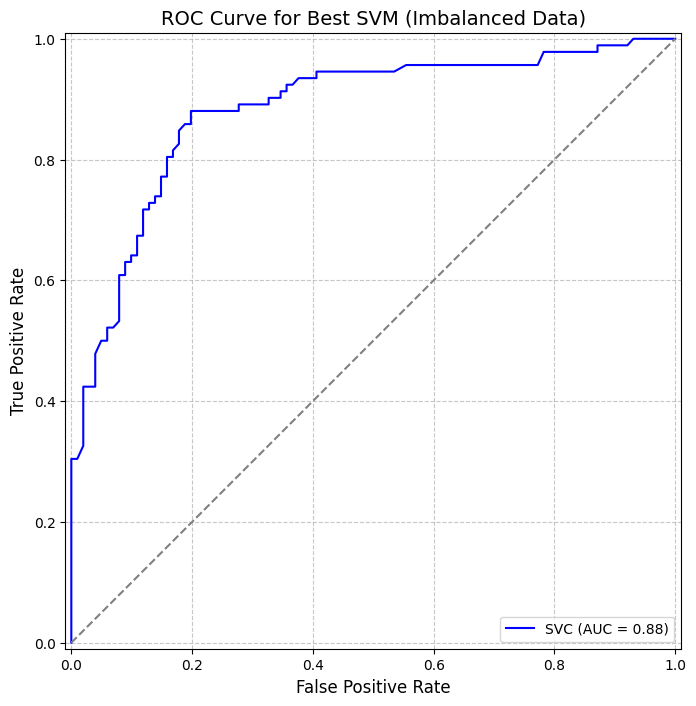

In [ ]:
plot_roc_curve_on(best_svm_imbalanced_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for Best SVM (Imbalanced Data)")

In [ ]:
joblib.dump(best_svm_imbalanced_mamm, '/content/drive/My Drive/best_svm_imbalanced_mamm.pkl')

['/content/drive/My Drive/best_svm_imbalanced_mamm.pkl']

In [ ]:
# Train SVM on SMOTE Balanced Data ###
print("\n----- Training SVM on SMOTE Balanced Data -----")
smote = SMOTE(random_state=42)
X_train_balanced_mamm, y_train_balanced_mamm = smote.fit_resample(X_train_mamm, y_train_mamm)

svm_smote_mamm = SVC(C=0.1, random_state=42, probability=True)
svm_smote_mamm.fit(X_train_balanced_mamm, y_train_balanced_mamm)
perform_cross_validation(svm_smote_mamm, X_train_balanced_mamm, y_train_balanced_mamm)
y_pred_smote_svm_mamm = svm_smote_mamm.predict(X_test_mamm)



----- Training SVM on SMOTE Balanced Data -----


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Cross-validation scores (f1): [0.80898876 0.75294118 0.77272727 0.79558011 0.81761006]
Average cross-validation score (f1): 0.7896


In [ ]:
print("SVM Accuracy (SMOTE Balanced Data):", accuracy_score(y_test_mamm, y_pred_smote_svm_mamm))
print("Classification Report (SMOTE Balanced Data - SVM):\n", classification_report(y_test_mamm, y_pred_smote_svm_mamm, target_names=['Benign', 'Malignant']))

SVM Accuracy (SMOTE Balanced Data): 0.7927461139896373
Classification Report (SMOTE Balanced Data - SVM):
               precision    recall  f1-score   support

      Benign       0.82      0.77      0.80       101
   Malignant       0.77      0.82      0.79        92

    accuracy                           0.79       193
   macro avg       0.79      0.79      0.79       193
weighted avg       0.79      0.79      0.79       193



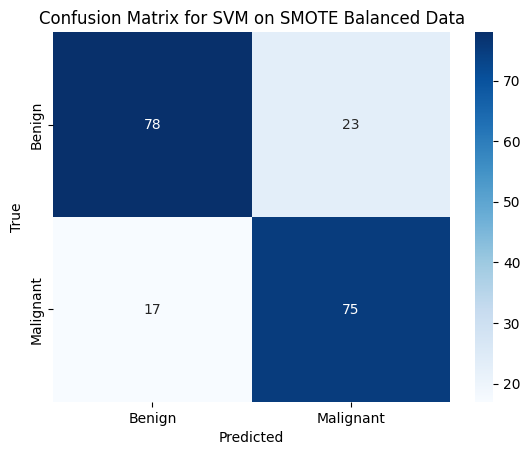

In [ ]:
conf_matrix_smote_svm_mamm = confusion_matrix(y_test_mamm, y_pred_smote_svm_mamm)
sns.heatmap(conf_matrix_smote_svm_mamm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for SVM on SMOTE Balanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


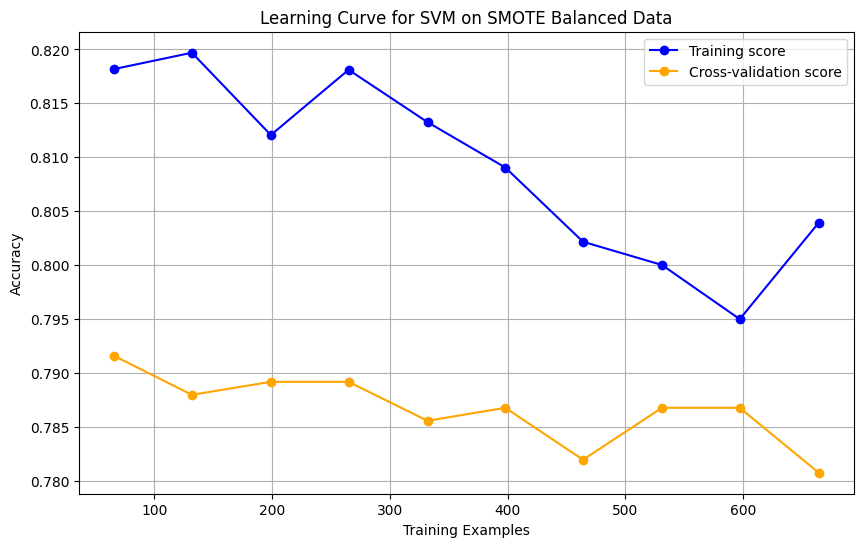

In [ ]:
plot_learning_curve(svm_smote_mamm, X_train_balanced_mamm, y_train_balanced_mamm, cv=5,use_smote=True, title="Learning Curve for SVM on SMOTE Balanced Data")

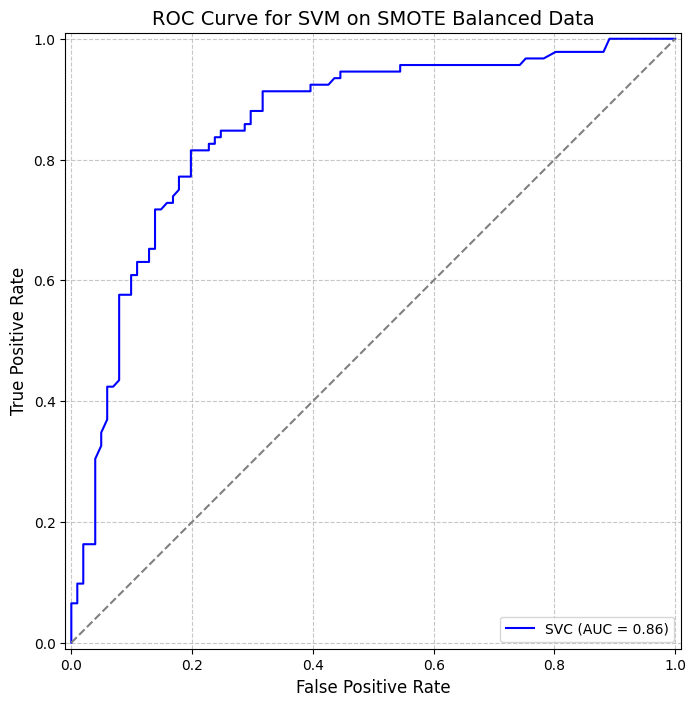

In [ ]:
plot_roc_curve_on(svm_smote_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for SVM on SMOTE Balanced Data")


----- Hyperparameter Tuning for SVM on SMOTE Balanced Data -----


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Best parameters for SVM (SMOTE Balanced Data): {'kernel': 'sigmoid', 'gamma': 0.1, 'degree': 5, 'class_weight': 'balanced', 'C': 0.1}
Best cross-validated accuracy (SMOTE Balanced Data): 0.8036144578313253
Cross-validation scores (f1): [0.81318681 0.79310345 0.79120879 0.81967213 0.83636364]
Average cross-validation score (f1): 0.8107


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


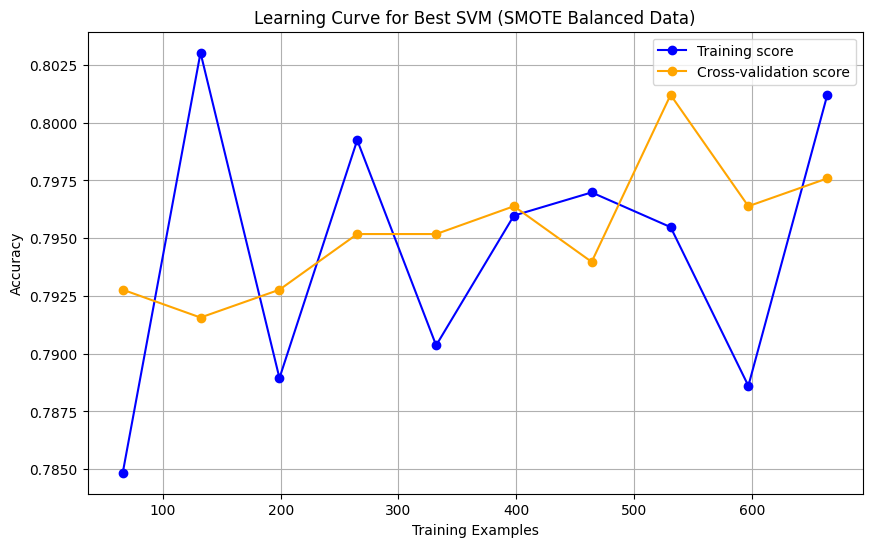

In [ ]:
# Hyperparameter Tuning for SMOTE Balanced Data (SVM) ###
print("\n----- Hyperparameter Tuning for SVM on SMOTE Balanced Data -----")
smote = SMOTE(random_state=42)
X_train_balanced_mamm, y_train_balanced_mamm = smote.fit_resample(X_train_mamm, y_train_mamm)

random_svm_smote_mamm = RandomizedSearchCV(estimator=SVC(random_state=42,probability=True),
                                        param_distributions=param_grid_svm,
                                        n_iter=50,  # Number of parameter settings sampled
                                        cv=5, scoring='accuracy',
                                        n_jobs=-1)
random_svm_smote_mamm.fit(X_train_balanced_mamm, y_train_balanced_mamm)

# Print the best parameters and score for the SMOTE balanced dataset
print("Best parameters for SVM (SMOTE Balanced Data):", random_svm_smote_mamm.best_params_)
print("Best cross-validated accuracy (SMOTE Balanced Data):", random_svm_smote_mamm.best_score_)

# Train the model with the best parameters
best_svm_smote_mamm = random_svm_smote_mamm.best_estimator_
best_svm_smote_mamm.fit(X_train_balanced_mamm, y_train_balanced_mamm)

perform_cross_validation(best_svm_smote_mamm, X_train_balanced_mamm, y_train_balanced_mamm)
y_pred_best_svm_smote_mamm = best_svm_smote_mamm.predict(X_test_mamm)
plot_learning_curve(best_svm_smote_mamm, X_train_balanced_mamm, y_train_balanced_mamm, cv=5,use_smote=True, title="Learning Curve for Best SVM (SMOTE Balanced Data)")



In [ ]:
print("SVM Accuracy (best SMOTE Balanced Data):", accuracy_score(y_test_mamm, y_pred_best_svm_smote_mamm))
print("Classification Report (best SMOTE Balanced Data - SVM):\n", classification_report(y_test_mamm, y_pred_best_svm_smote_mamm, target_names=['Benign', 'Malignant']))

SVM Accuracy (best SMOTE Balanced Data): 0.8134715025906736
Classification Report (best SMOTE Balanced Data - SVM):
               precision    recall  f1-score   support

      Benign       0.88      0.74      0.81       101
   Malignant       0.76      0.89      0.82        92

    accuracy                           0.81       193
   macro avg       0.82      0.82      0.81       193
weighted avg       0.82      0.81      0.81       193



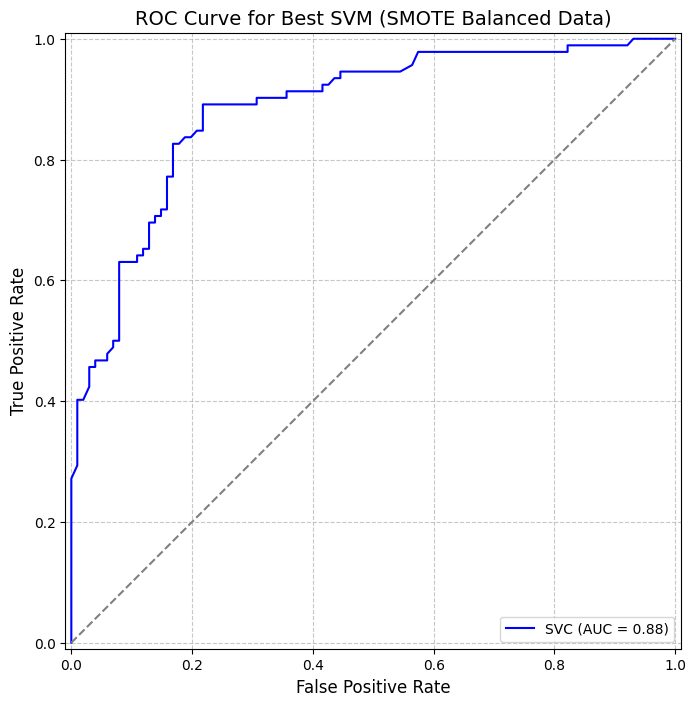

In [ ]:
plot_roc_curve_on(best_svm_smote_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for Best SVM (SMOTE Balanced Data)")

In [ ]:
joblib.dump(best_svm_smote_mamm, '/content/drive/My Drive/best_svm_smote_mamm.pkl')

['/content/drive/My Drive/best_svm_smote_mamm.pkl']